# Exploratory Data Analysis for the hospital readmission problem

In [1]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import Imputer
import sys
sys.path.append('icd9')
from icd9 import ICD9
import re
import pickle
import seaborn as sns
import pylab
from scipy import stats
sns.set()

In [2]:
with open('clean_data/df.pkl', 'rb') as f:
        df = pickle.load(f)
with open('clean_data/df_labels.pkl', 'rb') as f:
        df_labels = pickle.load(f)

## What variables are the most significant for predicting the readmitted variable?

To answer that question I will create a cluster map of Pearson correlation  coefficients for all the variables in the data set.

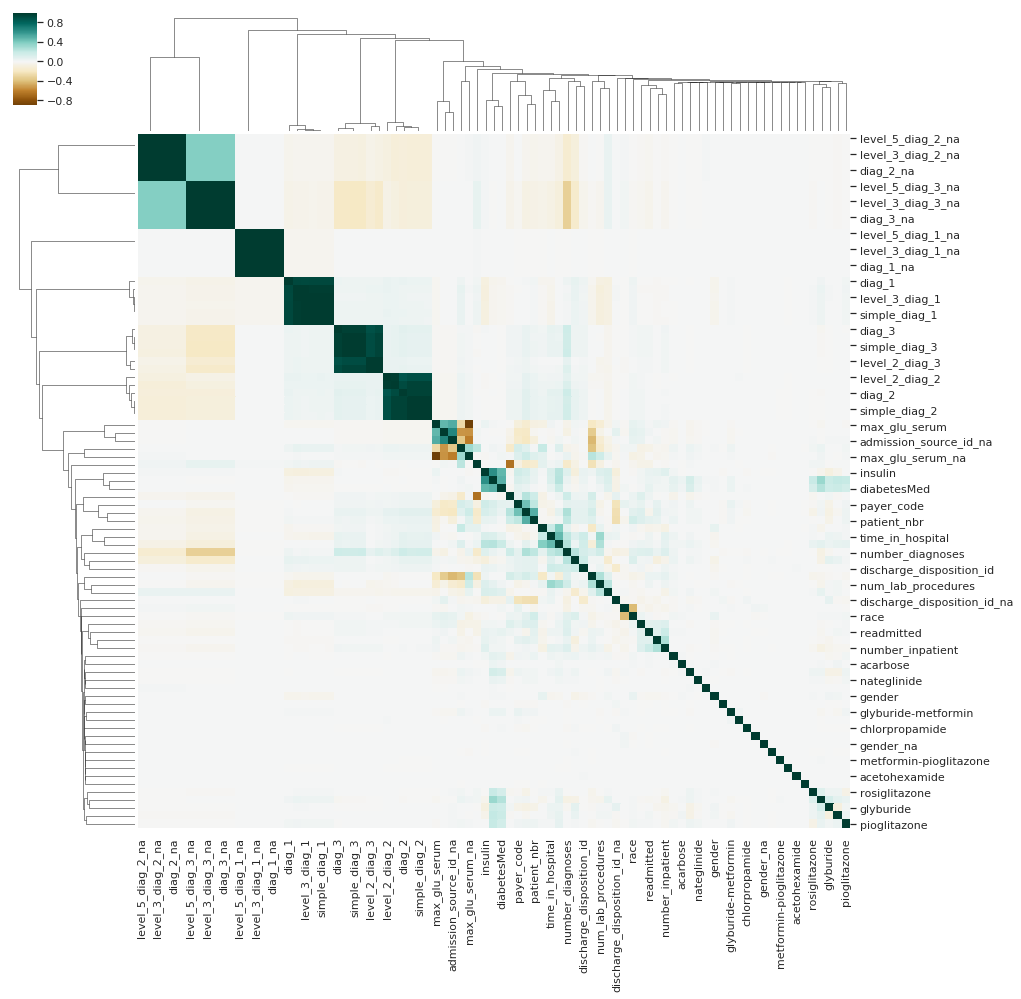

In [3]:
corr = df.corr()
sns.clustermap(corr,
        center=0,
        cmap='BrBG',
        figsize=(15, 15))

Due to the large number of variables I will select only the variables that have a higher degree of positive or negative correlation with the readmitted variable. 

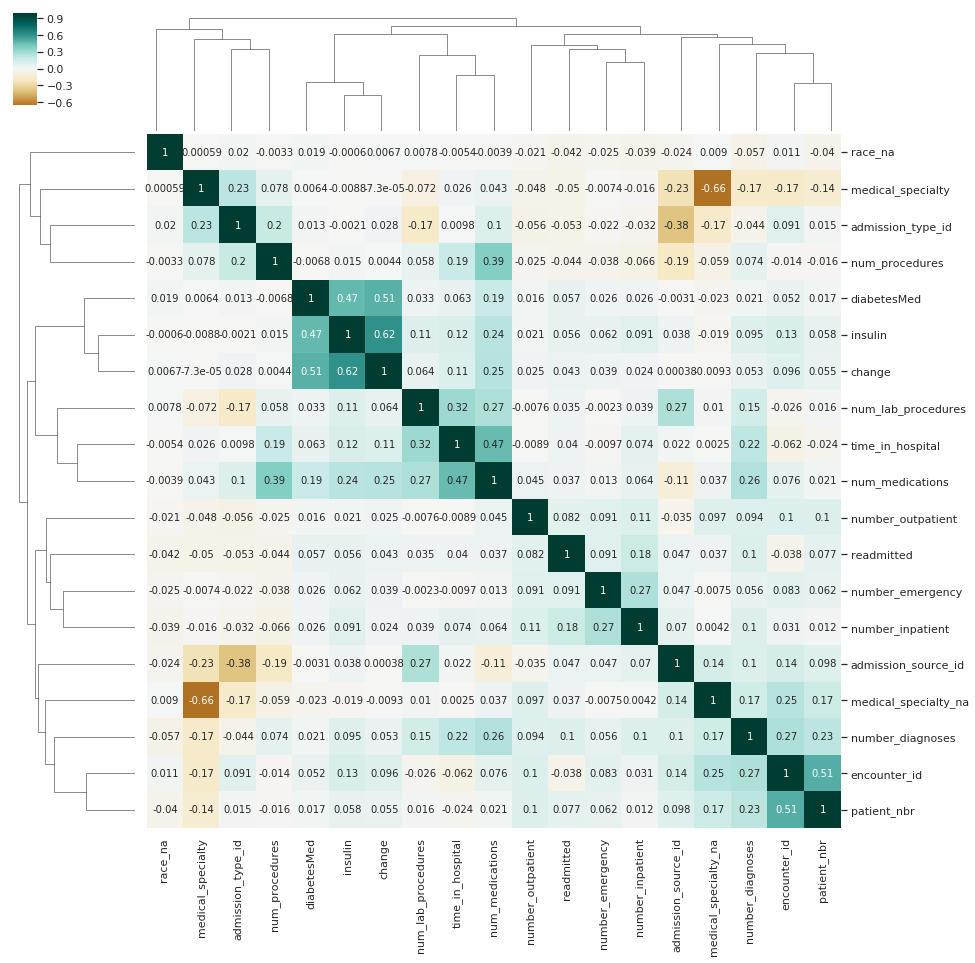

In [4]:
corr_thresh = 0.035
df_correlated = df.loc[:, ((corr.readmitted.sort_values()<-corr_thresh) | (corr.readmitted.sort_values()>corr_thresh))]
corr_high = df_correlated.corr()
p = sns.clustermap(corr_high,
        square=True,
        center=0,
        cmap='BrBG',
        annot=True,
        figsize=(15, 15))

Overall there is moderate to low correlation between the `readmitted` variable and other variables. The variables showing largest correlation are: `number_inpatient`, `number_emergency`, and `number_outpatient`.

In [5]:
drugs = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
        'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglit', 'troglitazone',
        'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
        'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']
def frequencies_by_groups(df, groups, df_labels):
    by_groups = df[groups].groupby(groups).size()
    by_groups.name = 'value_count'
    by_groups = by_groups.reset_index()
    by_group1_sum = df[groups].groupby(groups[0]).size()
    by_group1_sum.name = 'sum_by_{}'.format(groups[0])
    by_group1_sum = by_group1_sum.reset_index()
    by_groups_merged = by_groups.merge(by_group1_sum)
    by_groups_merged['frequency'] = by_groups_merged.value_count.divide(by_groups_merged['sum_by_{}'.format(groups[0])])
    by_groups_merged.readmitted = by_groups_merged.readmitted.map(dict(zip(range(len(df_labels['readmitted'])), df_labels['readmitted'])))
    if groups[0] in drugs:
        by_groups_merged[groups[0]] = by_groups_merged[groups[0]].map(dict(zip(range(len(df_labels['drugs'])), df_labels['drugs'])))
    elif groups[0] in df_labels.keys():
        by_groups_merged[groups[0]] = by_groups_merged[groups[0]].map(dict(zip(range(len(df_labels[groups[0]])), df_labels[groups[0]])))
    return by_groups_merged
#frequencies_by_groups(df, ['race', 'readmitted'], df_labels)

Next, I am going to explore how the frequencies of individual variables are distributed across the `readmitted`categories. 

In [6]:
x_columns = [
 'race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'race_na',
 'gender_na',
 'admission_type_id_na',
 'discharge_disposition_id_na',
 'admission_source_id_na',
 'medical_specialty_na',
 'diag_1_na',
 'diag_2_na',
 'diag_3_na'
]

race


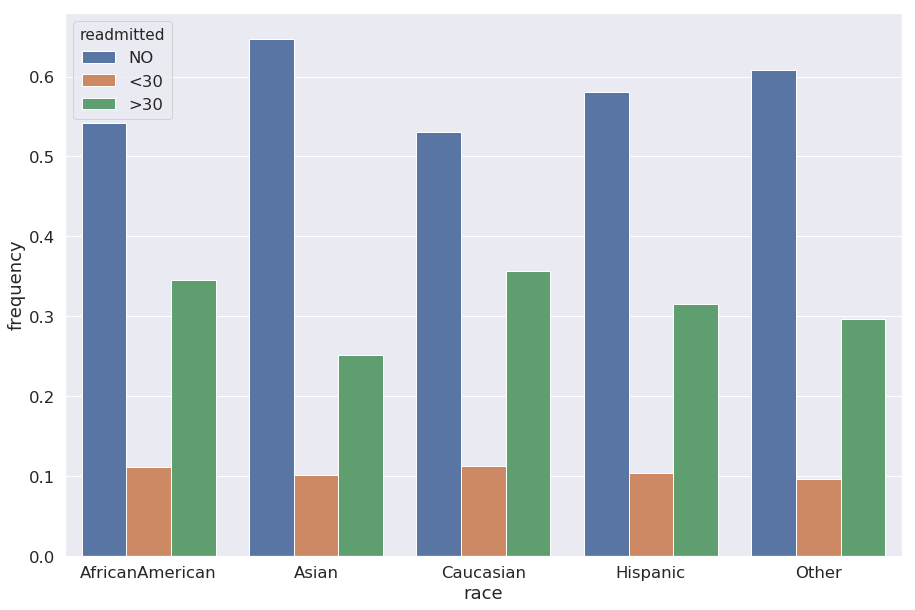

gender


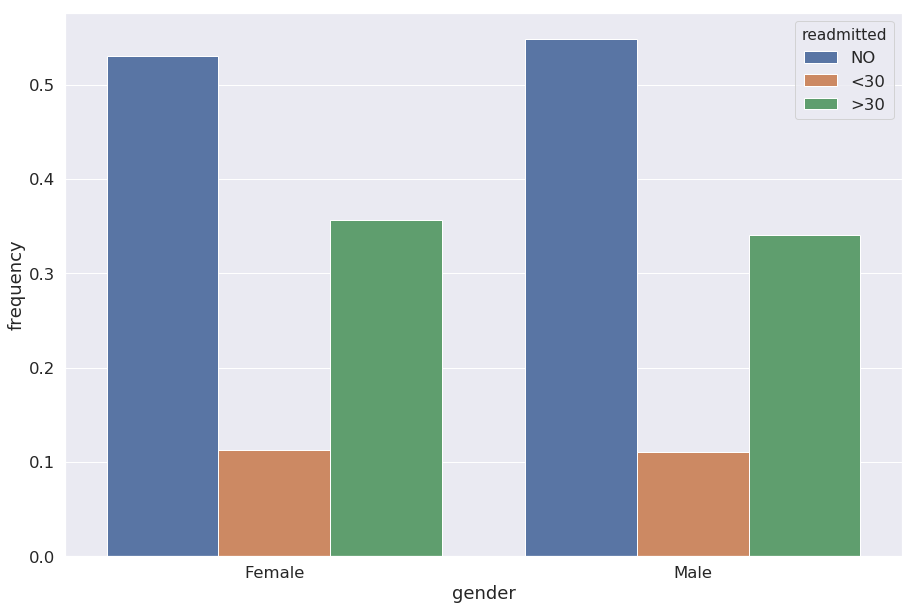

age


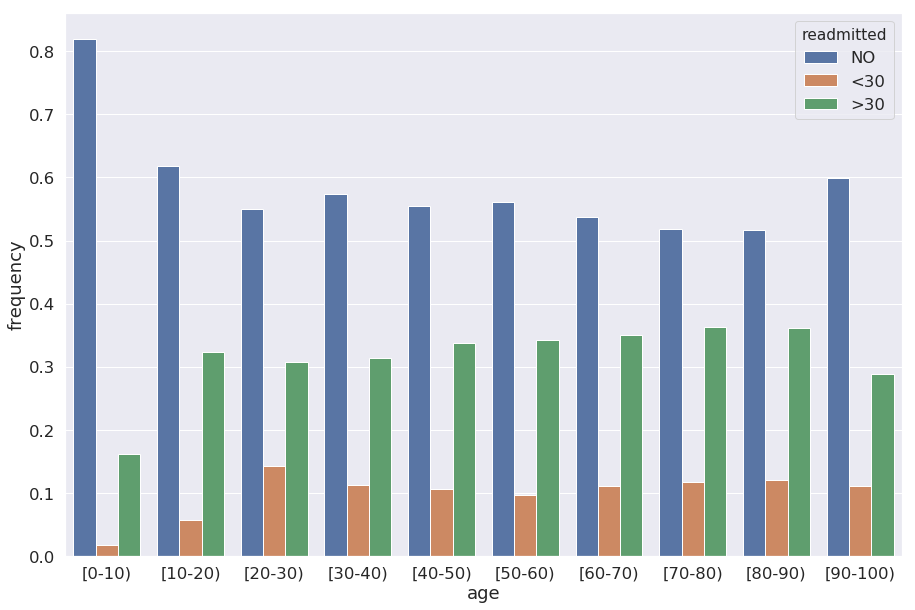

admission_type_id


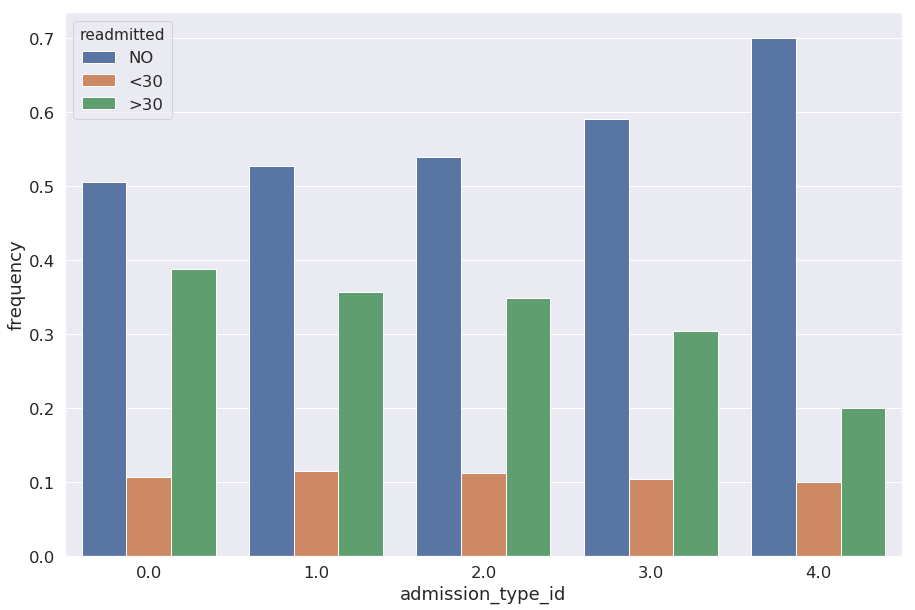

discharge_disposition_id


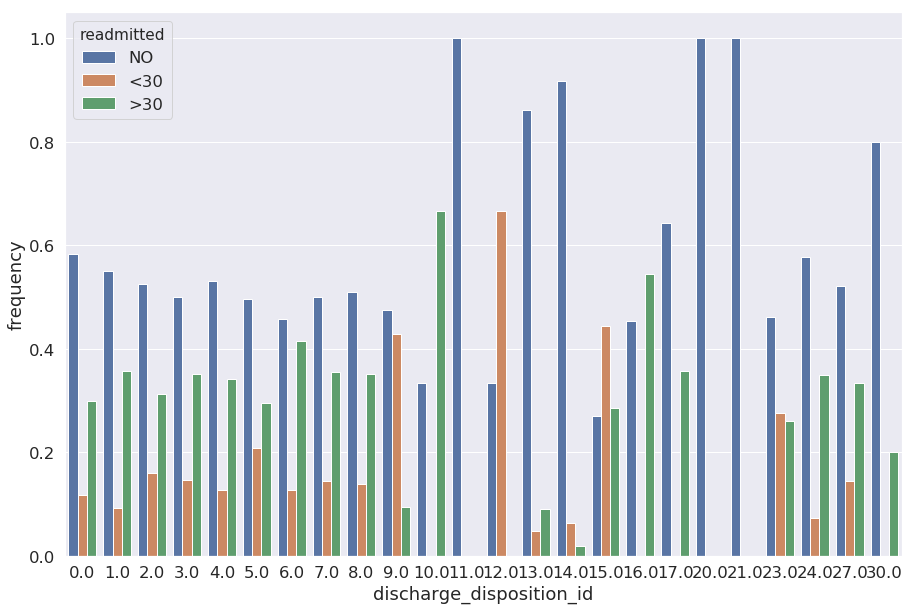

admission_source_id


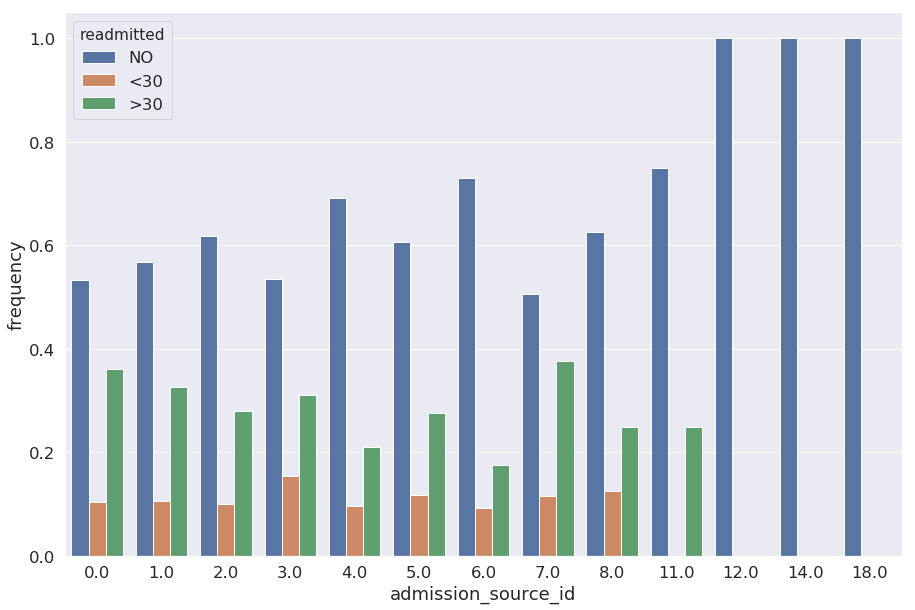

time_in_hospital


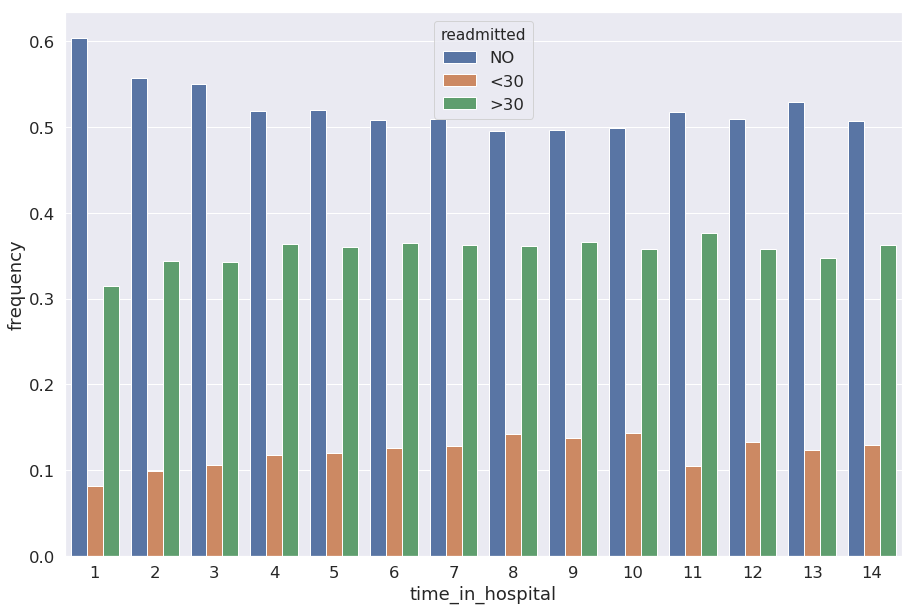

payer_code


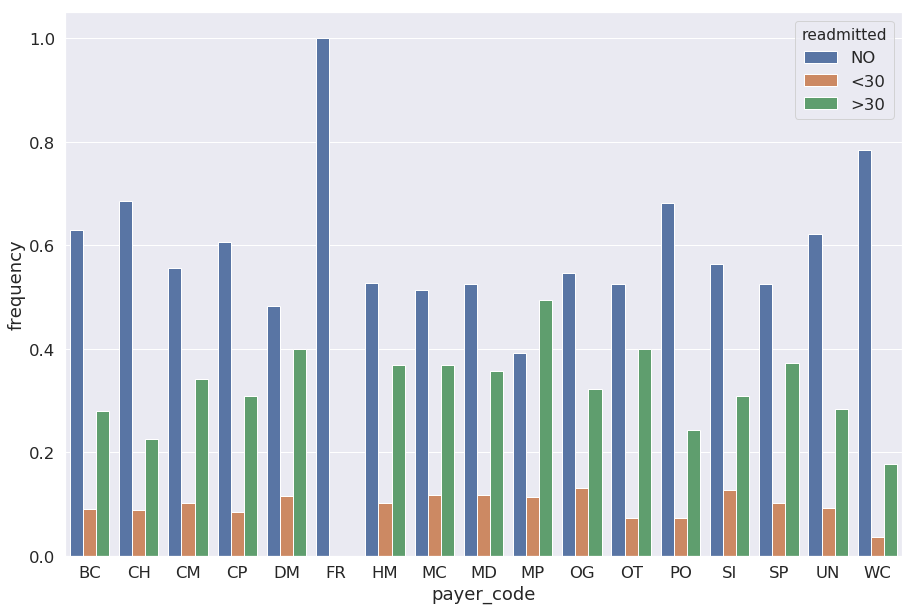

medical_specialty


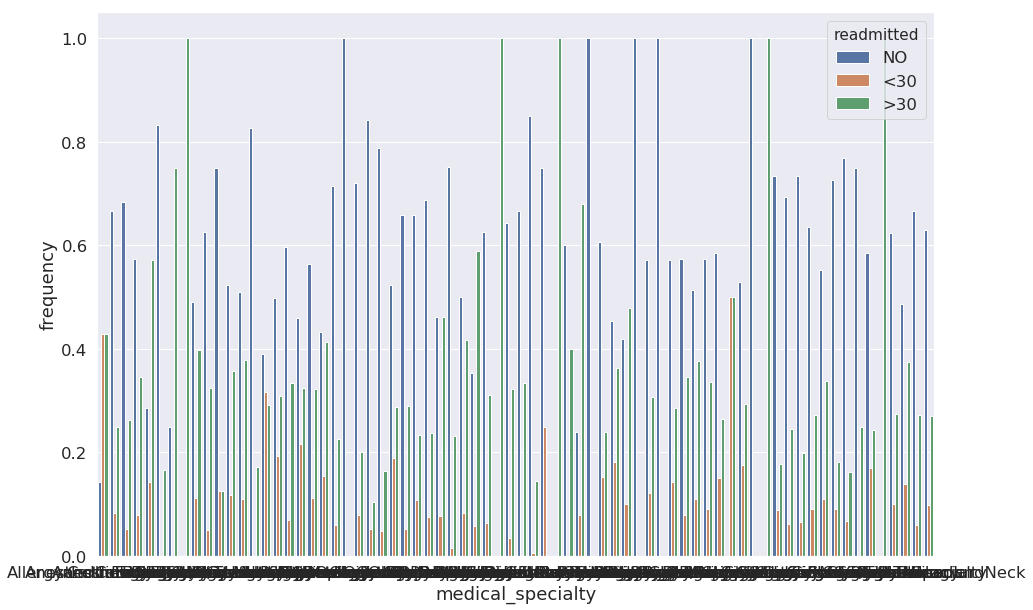

num_lab_procedures


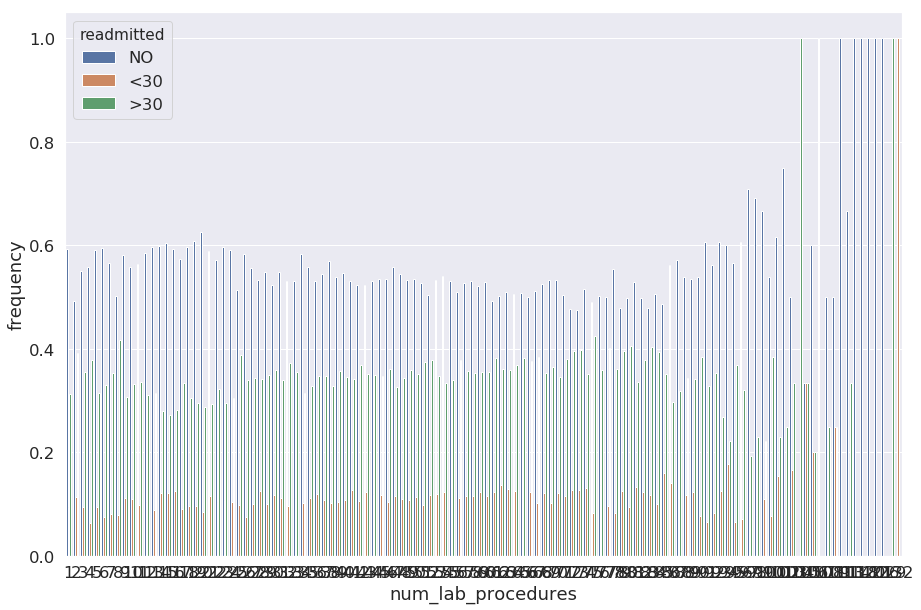

num_procedures


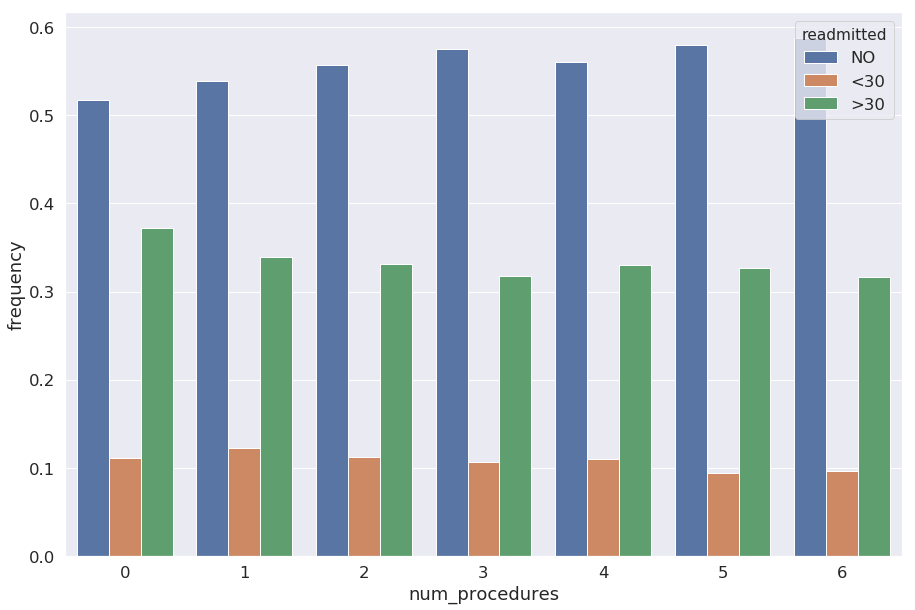

num_medications


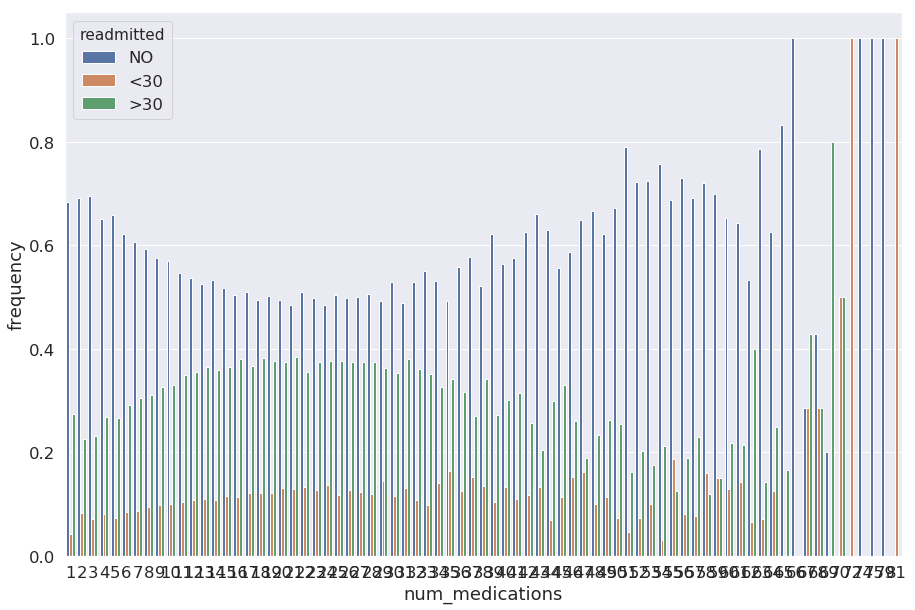

number_outpatient


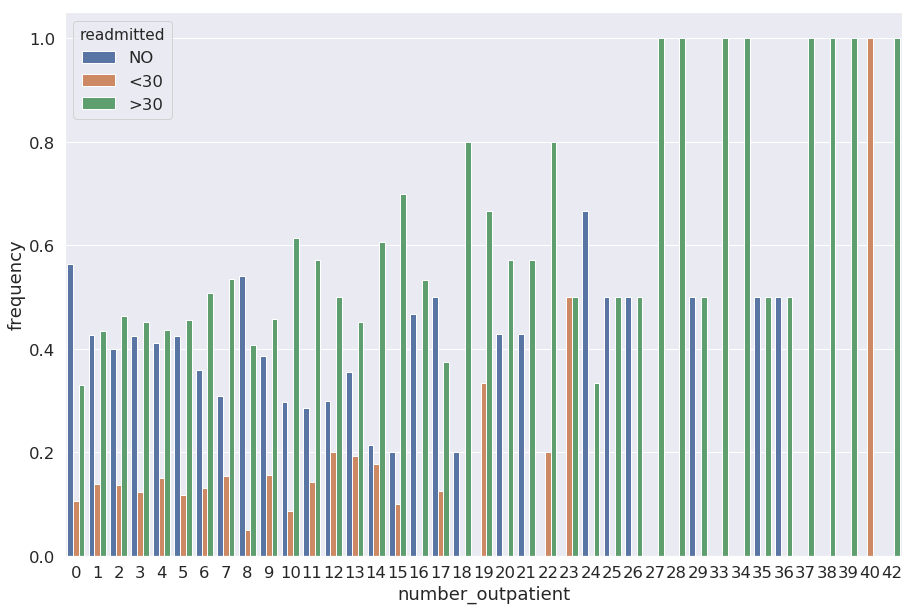

number_emergency


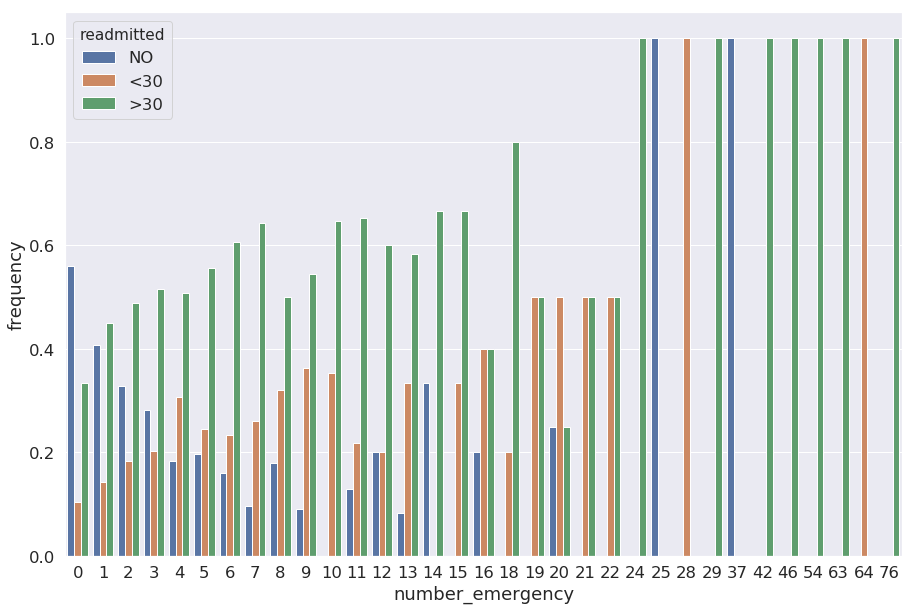

number_inpatient


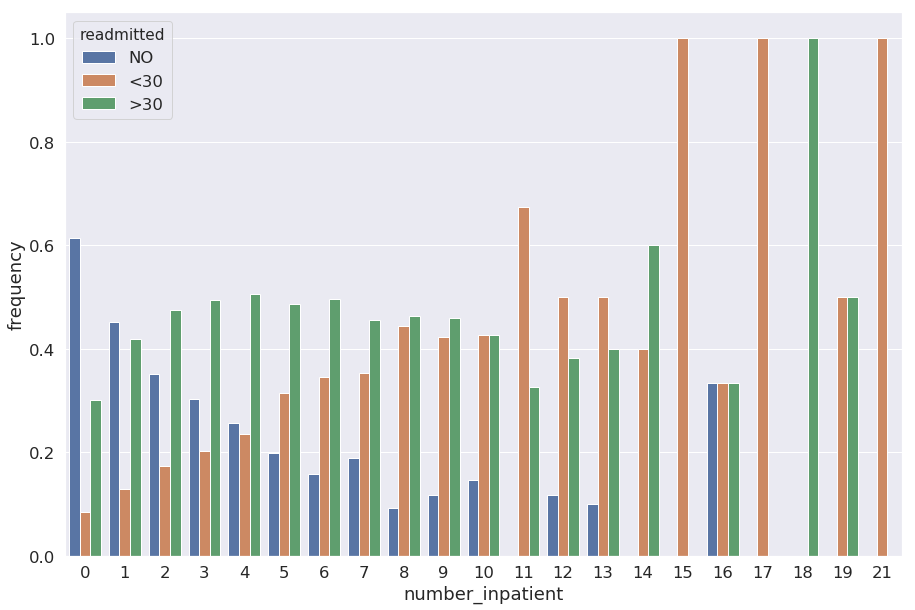

number_diagnoses


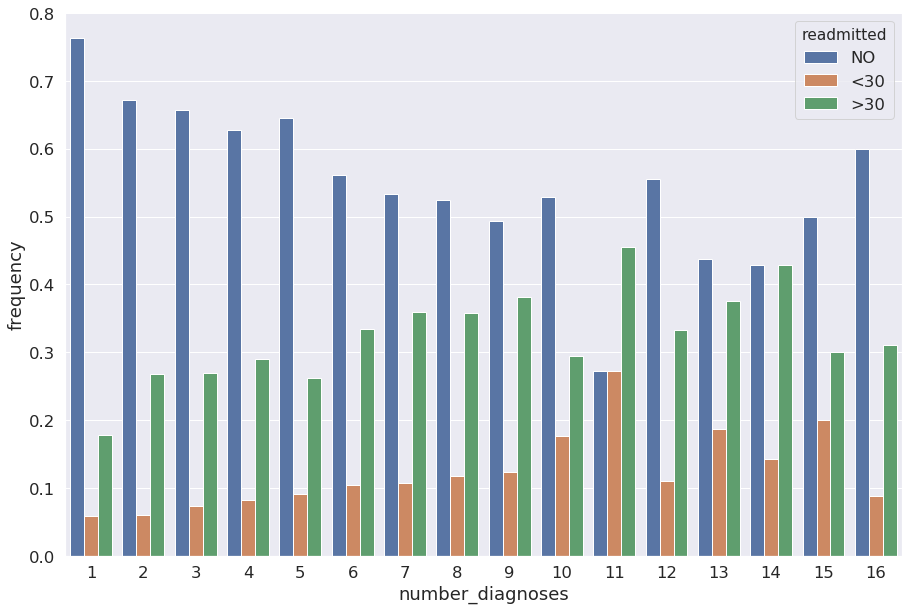

max_glu_serum


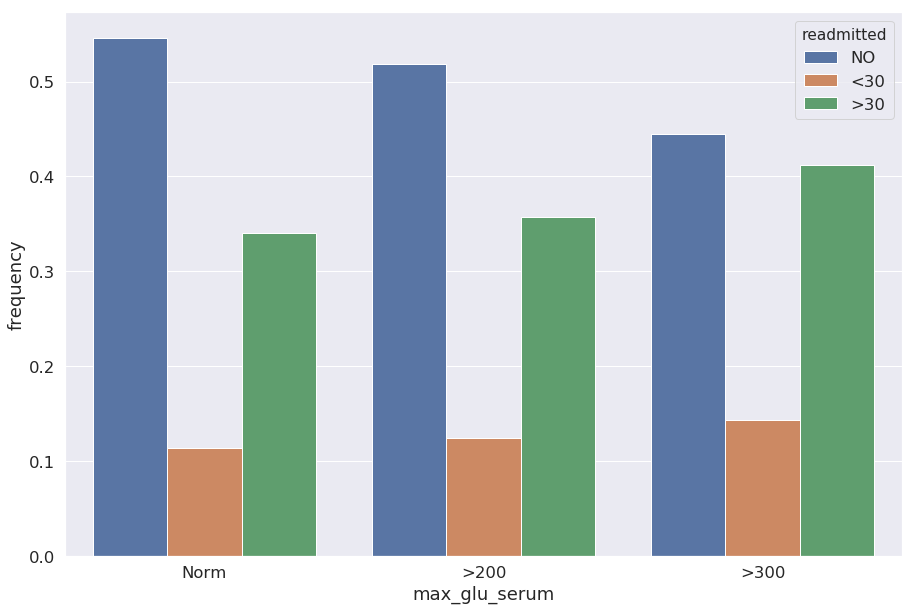

A1Cresult


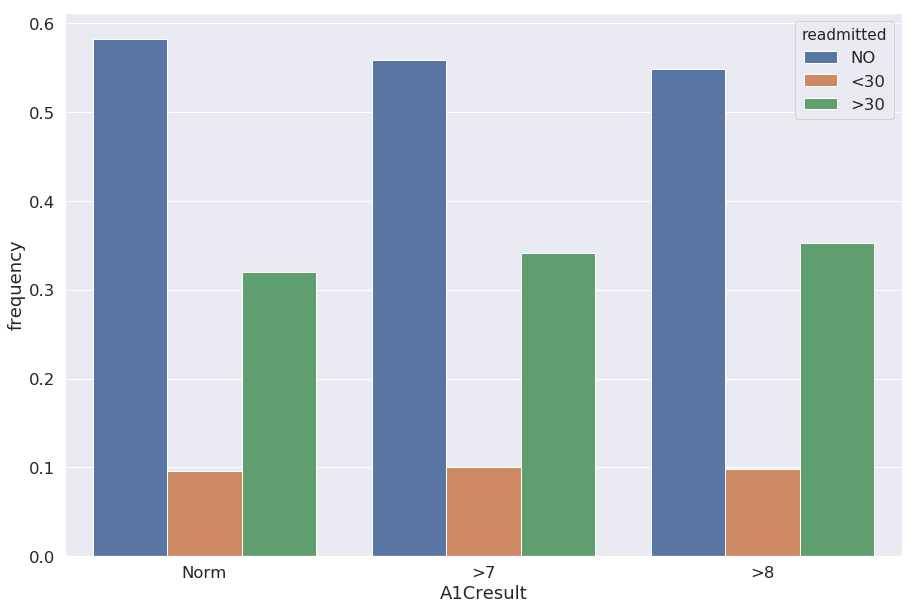

metformin


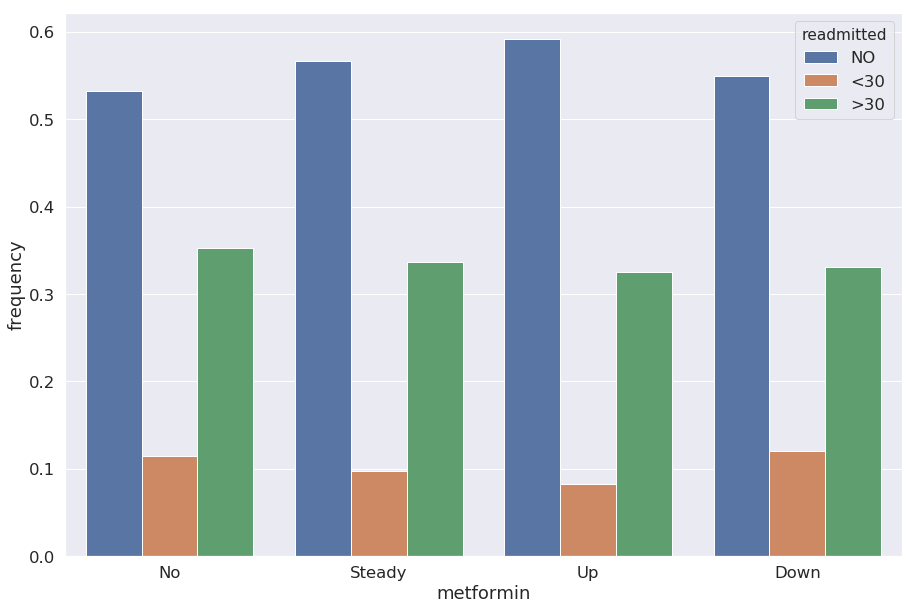

repaglinide


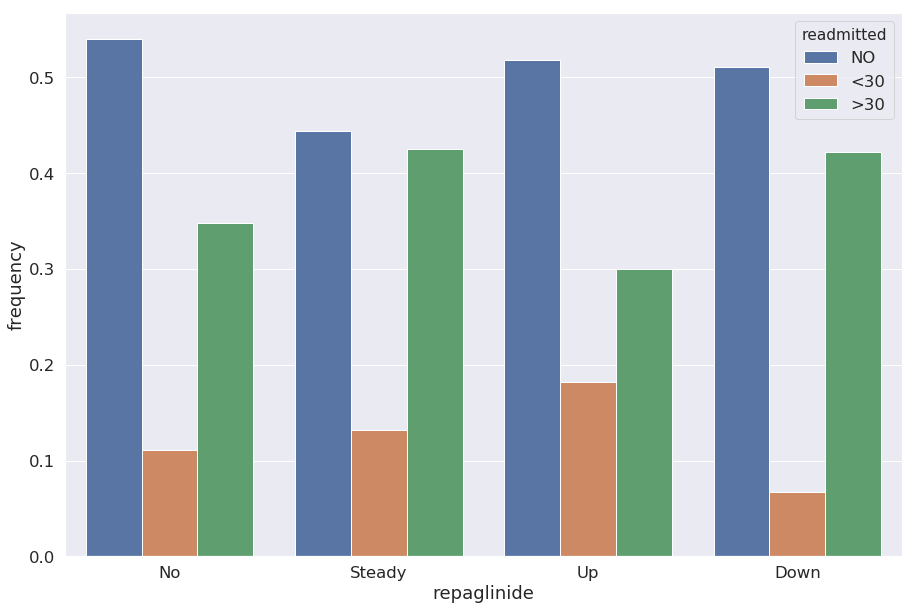

nateglinide


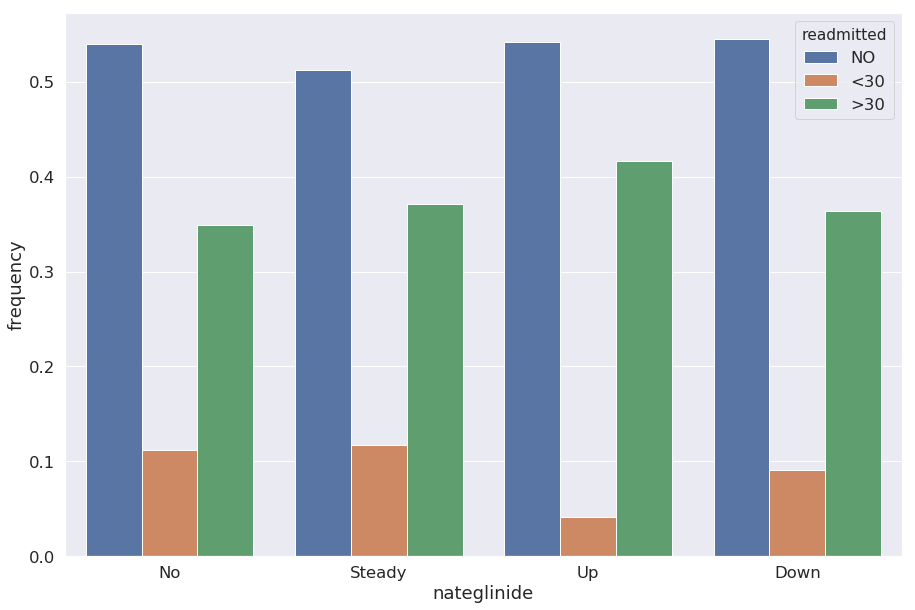

chlorpropamide


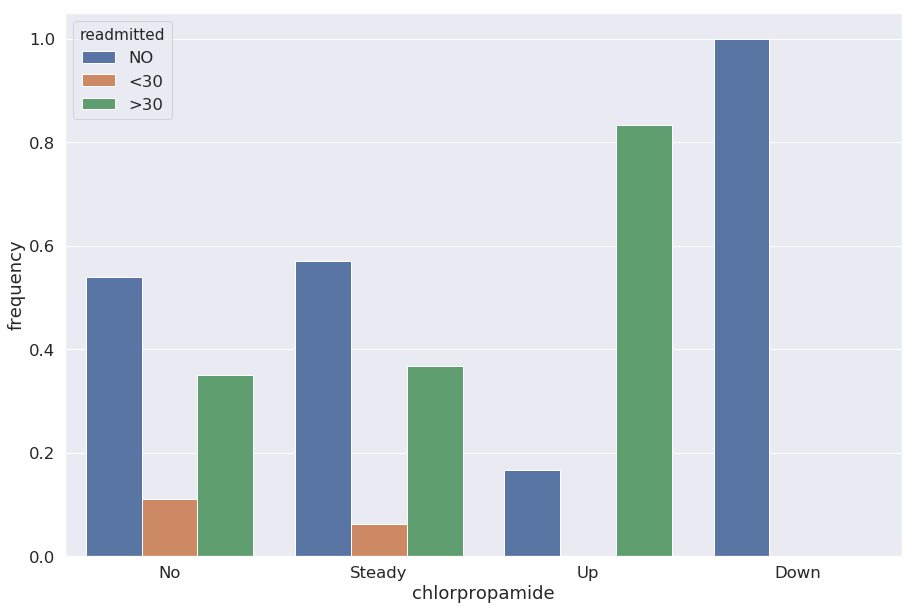

glimepiride


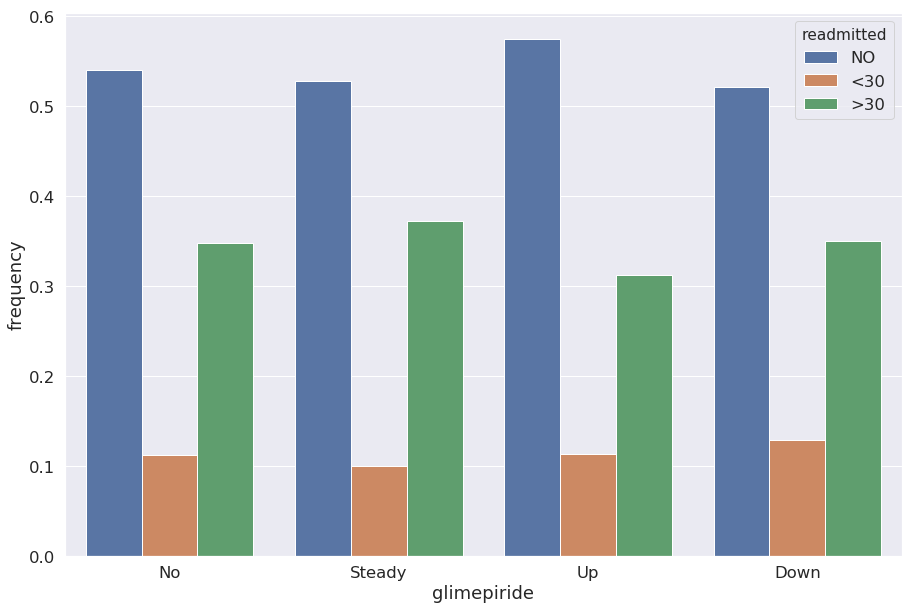

acetohexamide


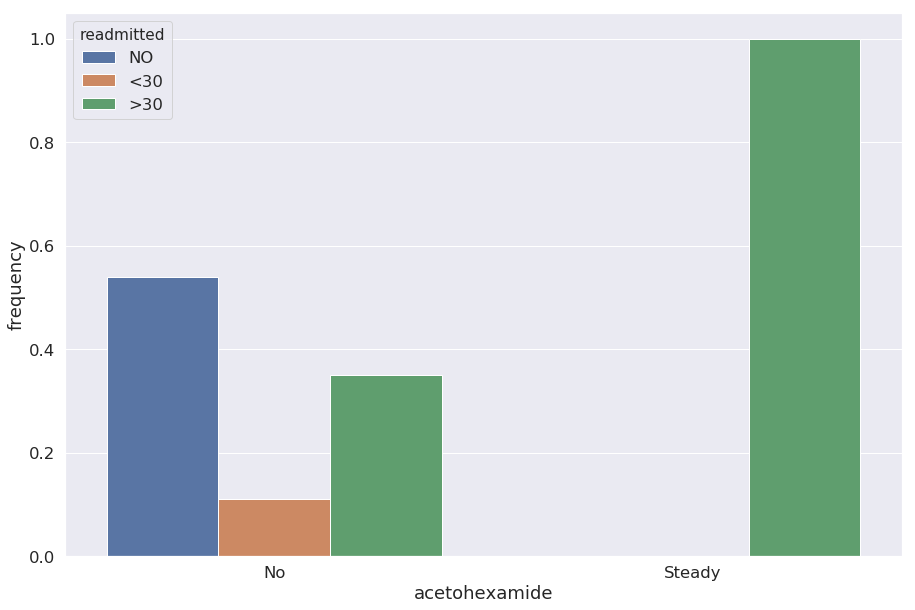

glipizide


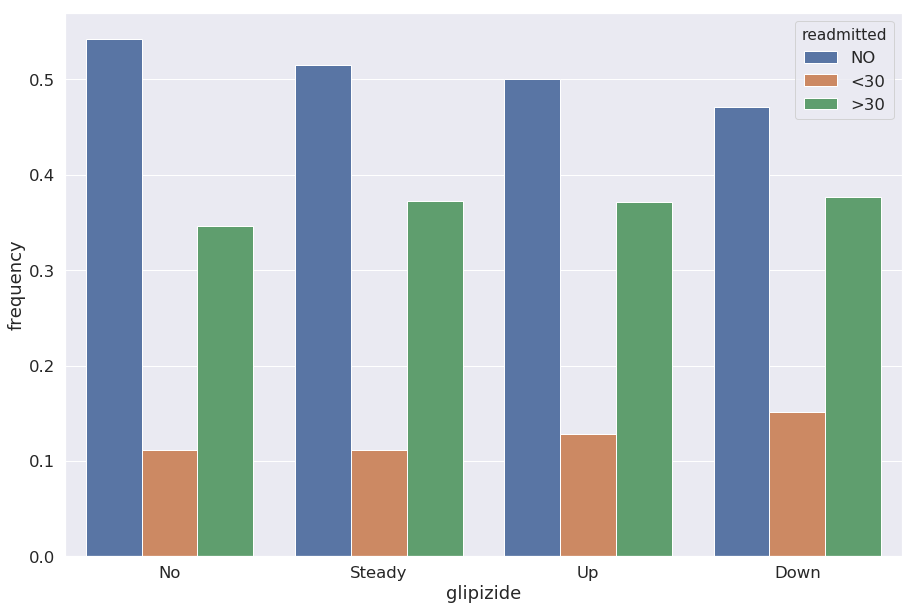

glyburide


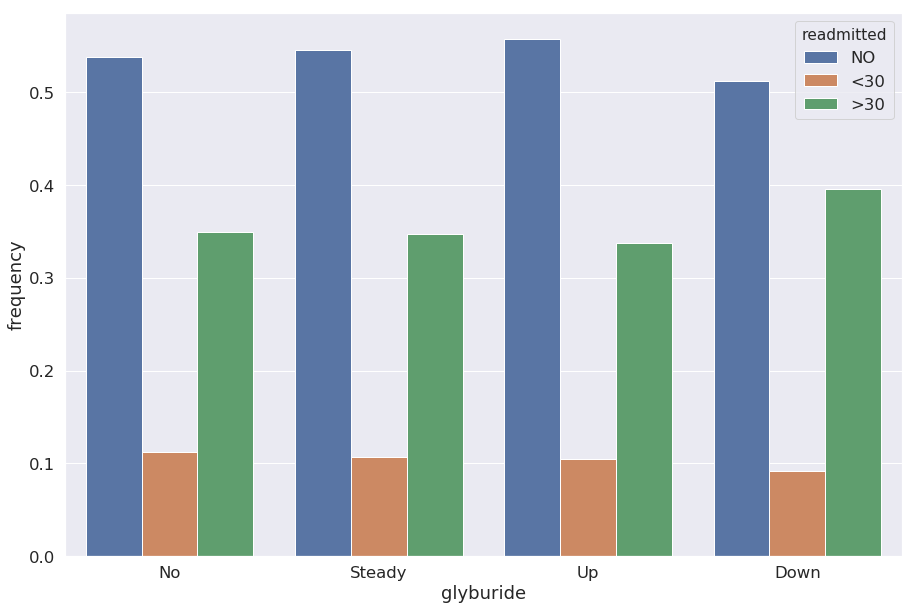

tolbutamide


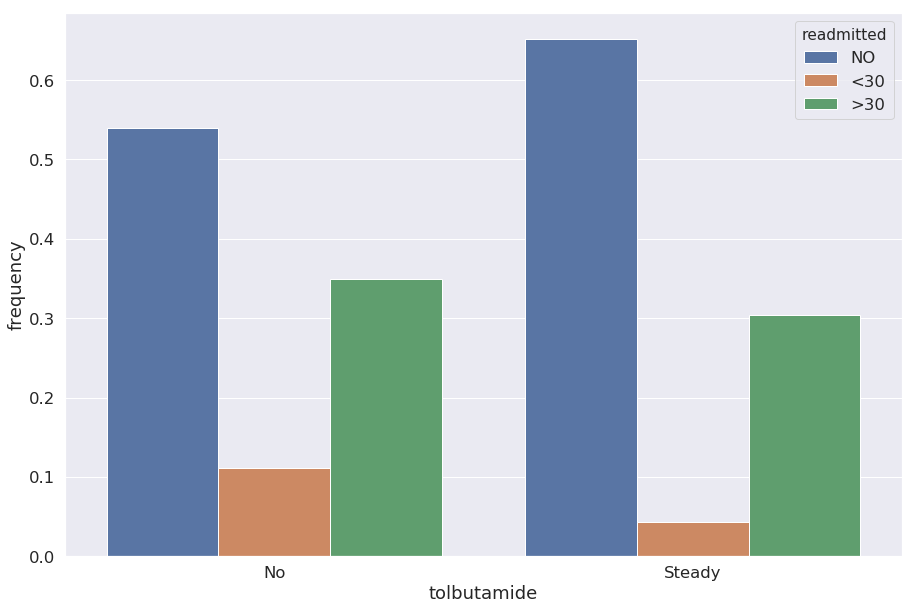

pioglitazone


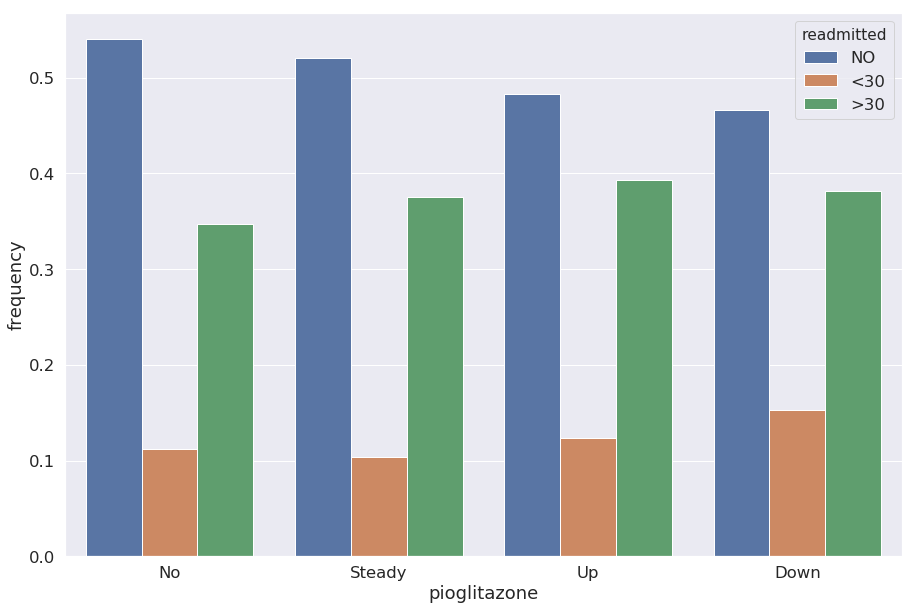

rosiglitazone


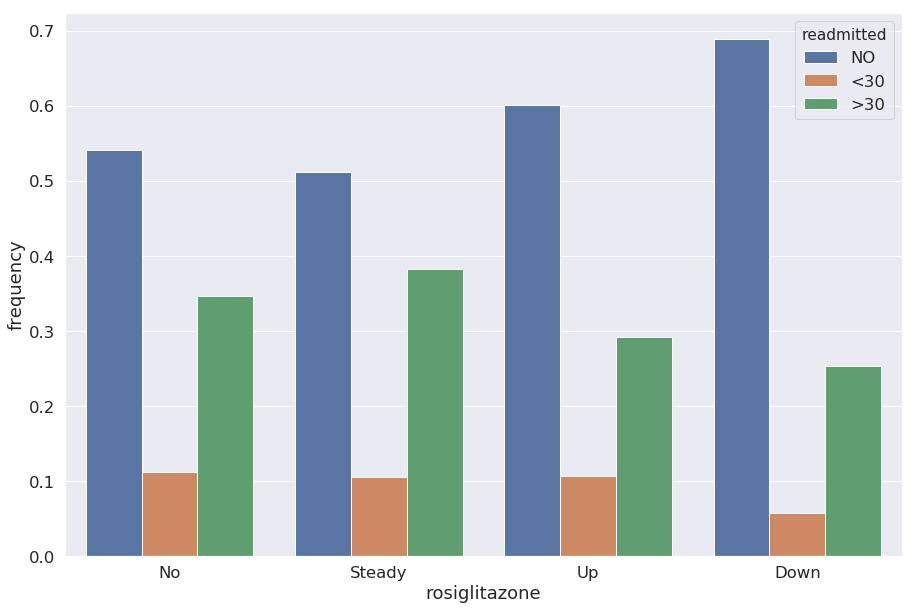

acarbose


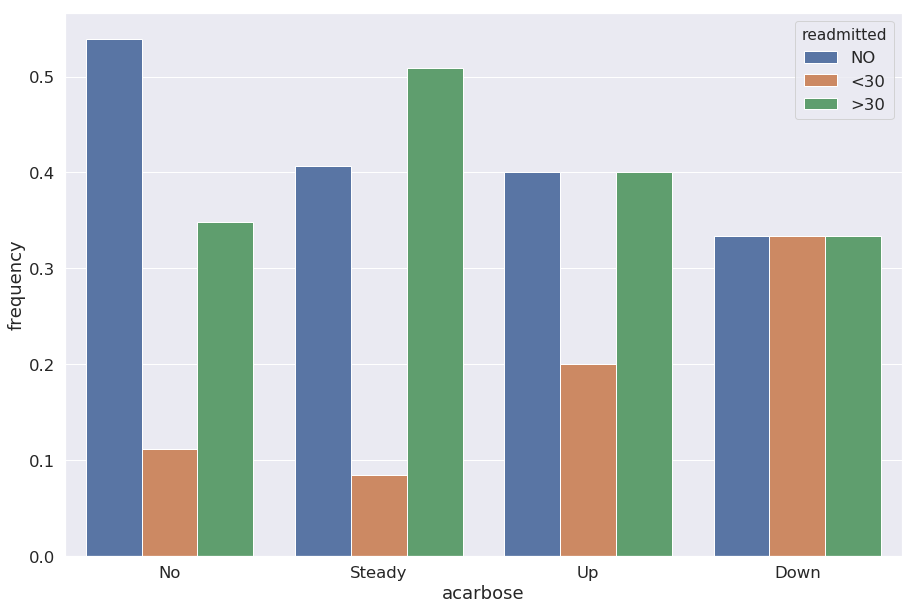

miglitol


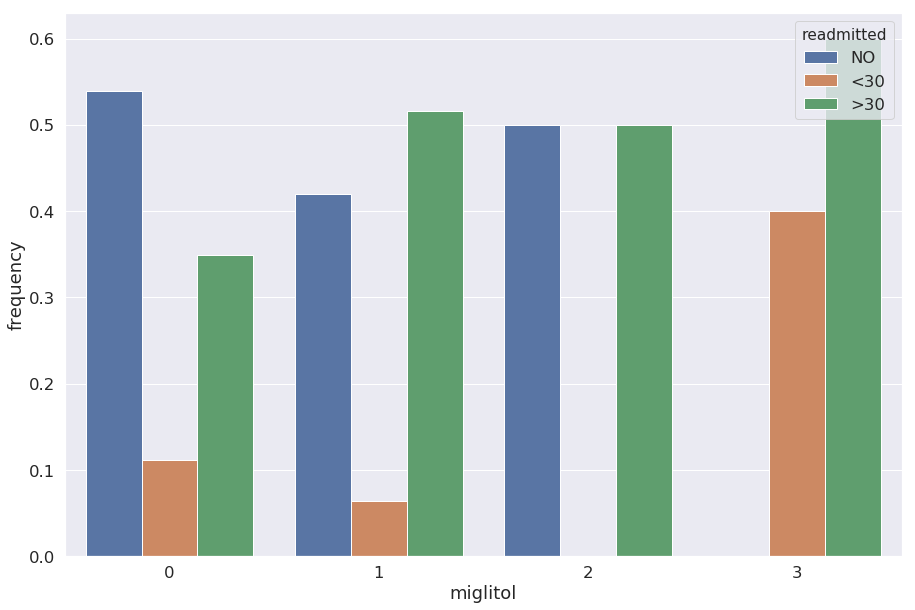

troglitazone


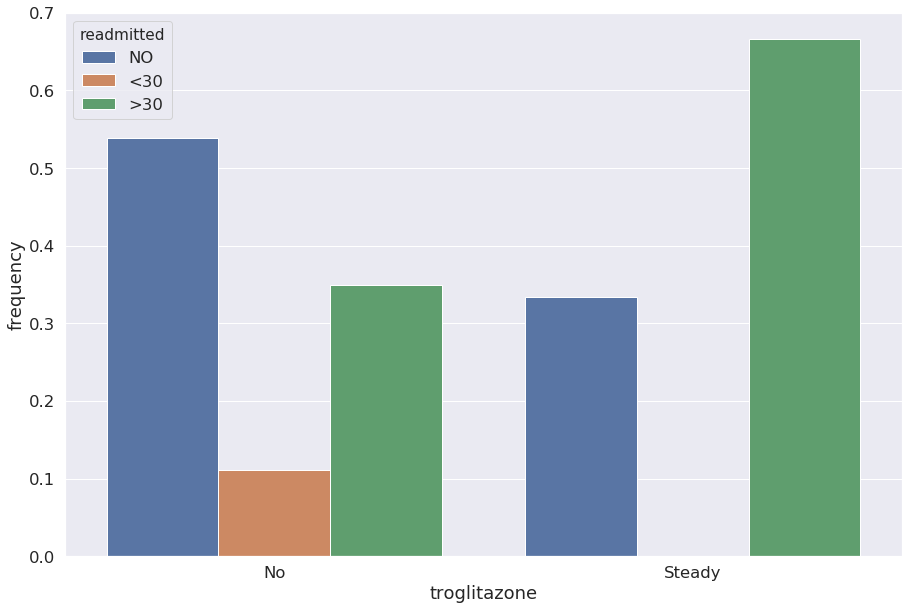

tolazamide


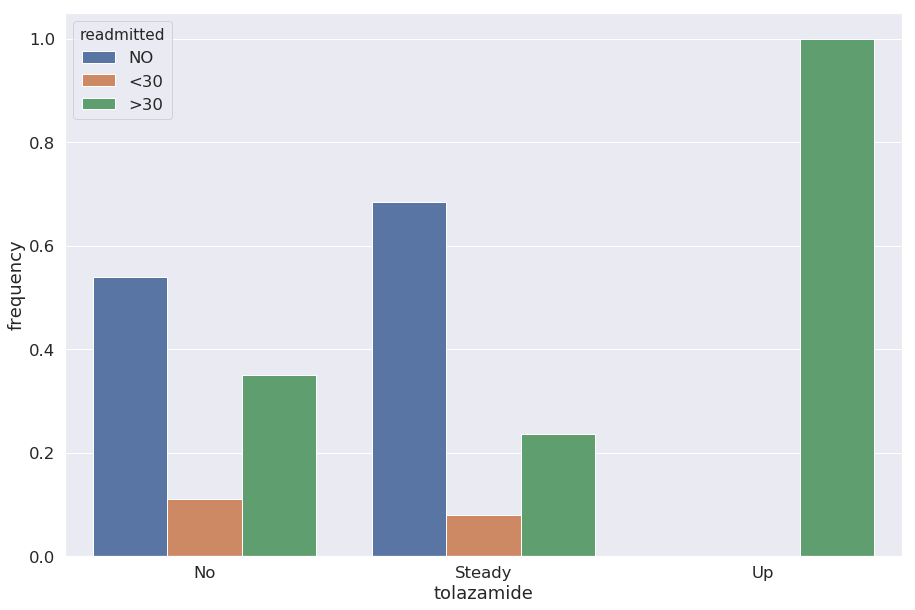

insulin


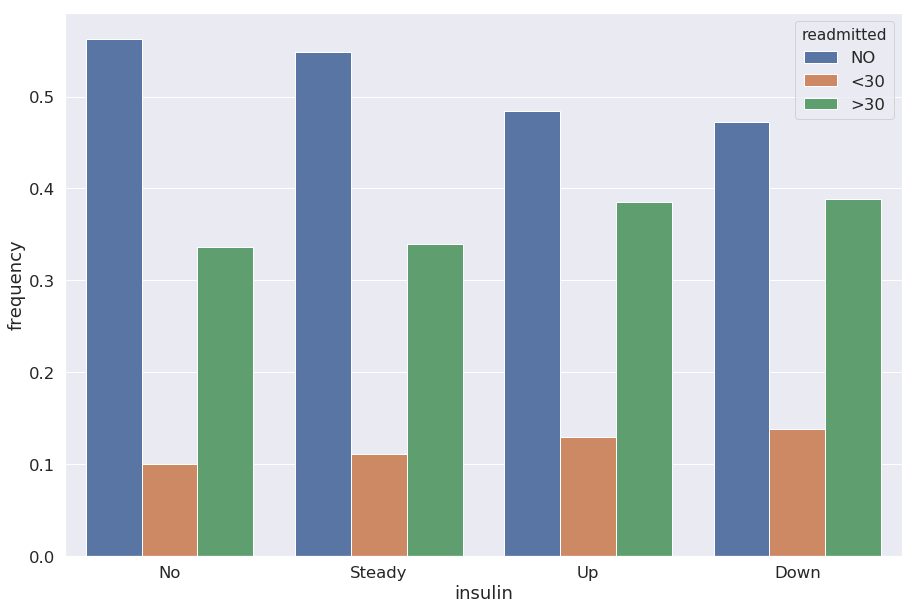

glyburide-metformin


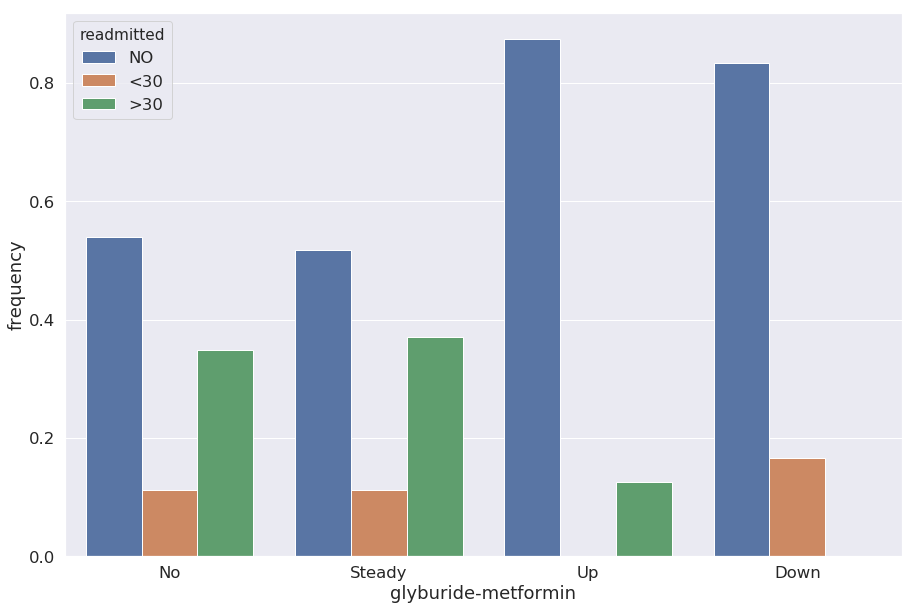

glipizide-metformin


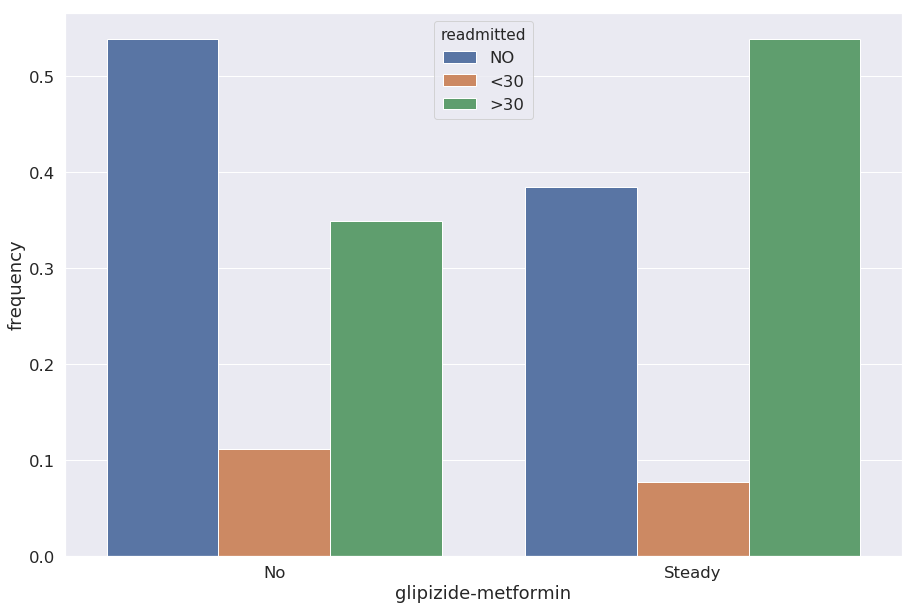

glimepiride-pioglitazone


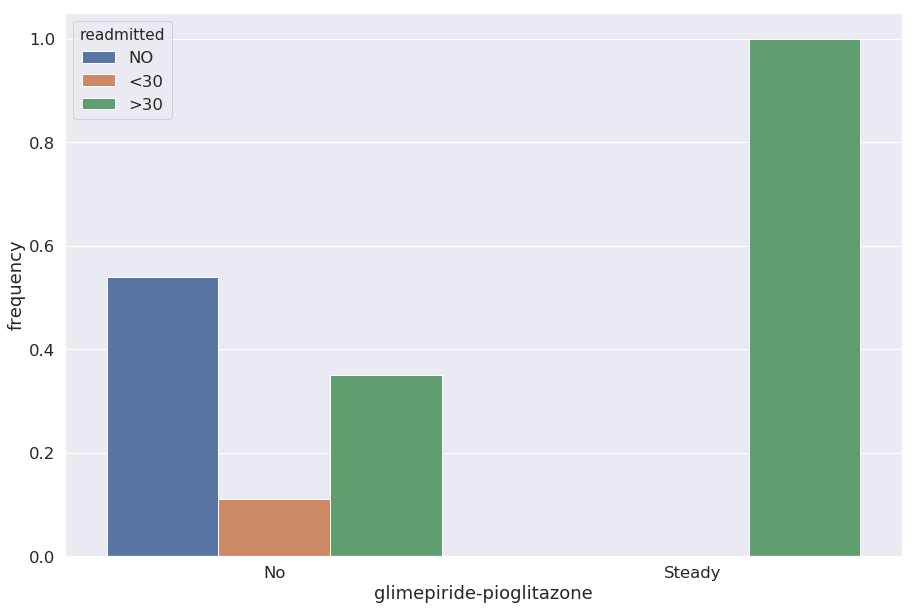

metformin-rosiglitazone


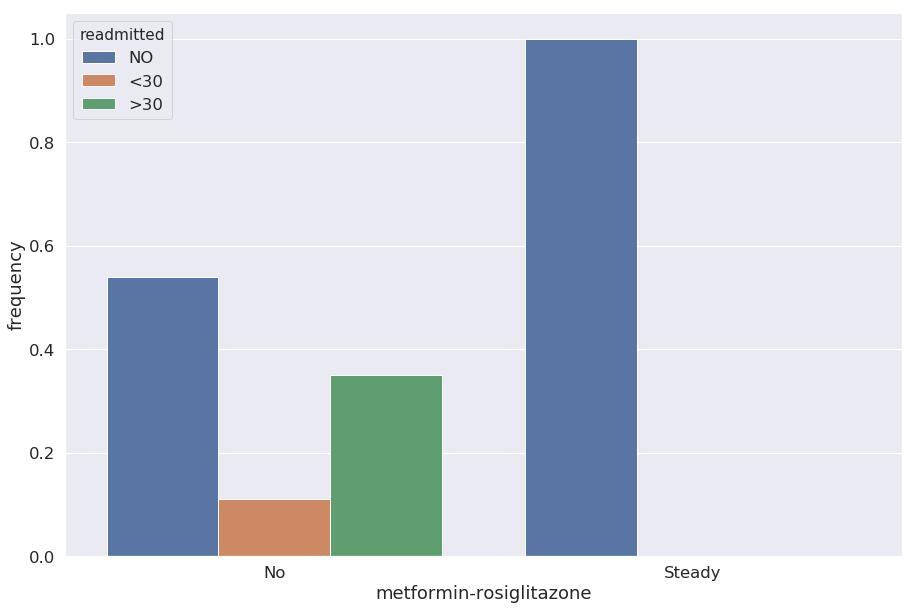

metformin-pioglitazone


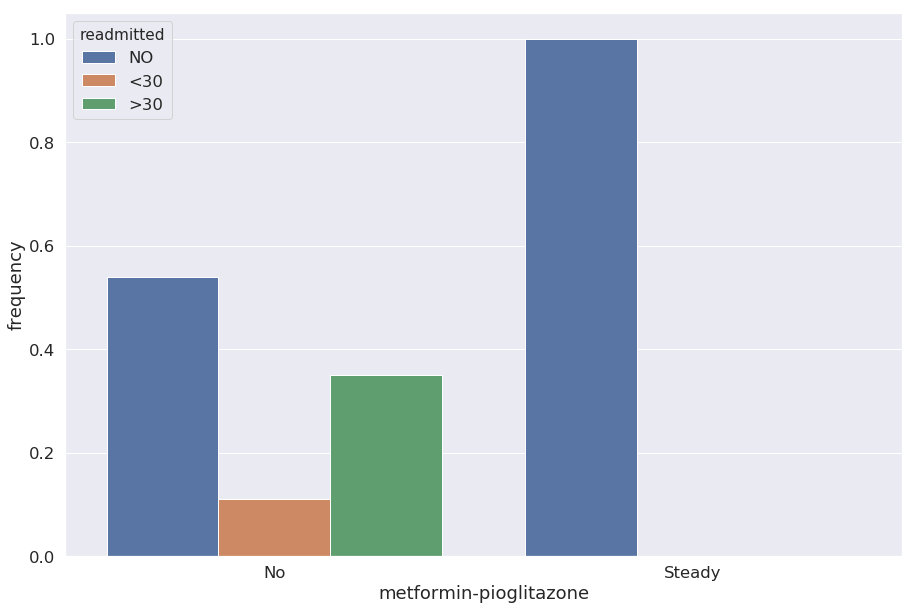

change


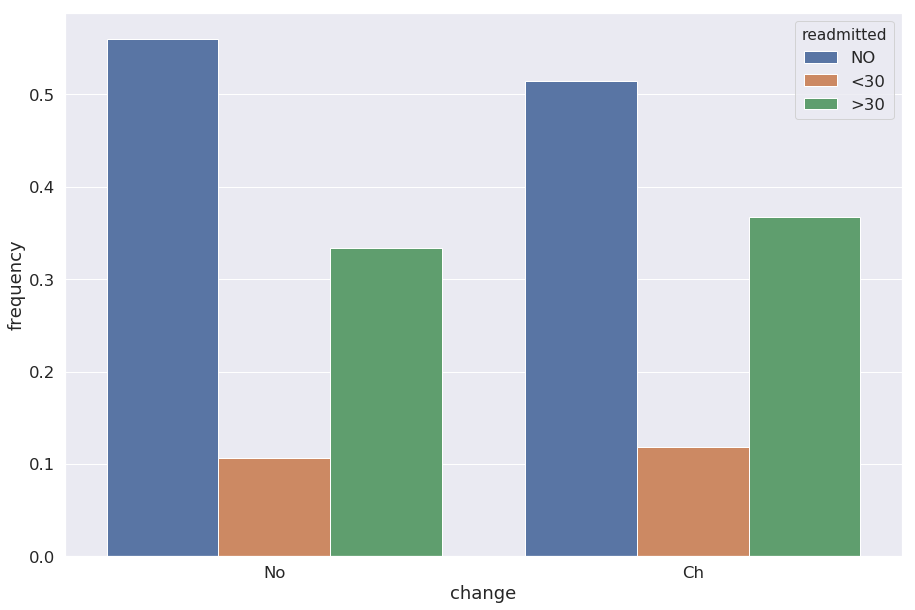

diabetesMed


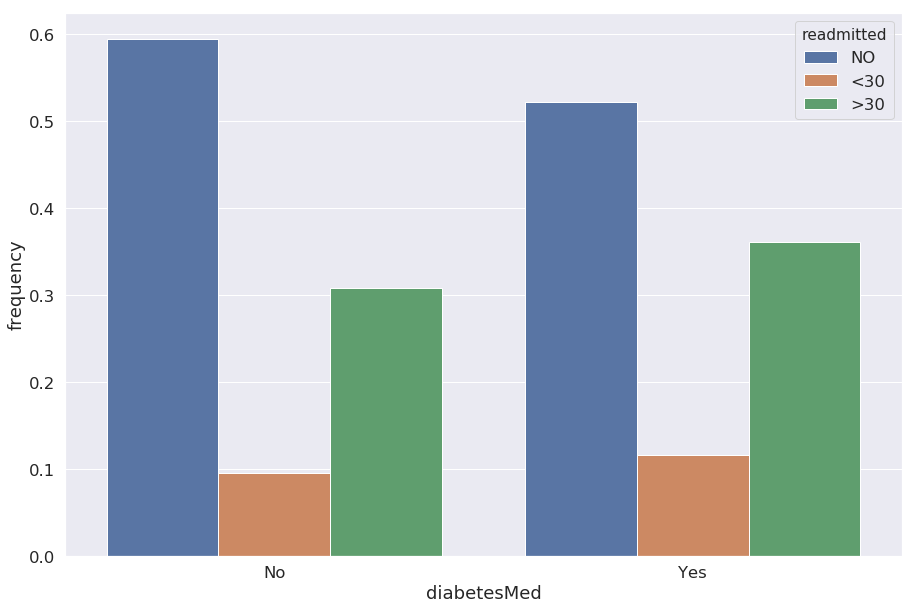

race_na


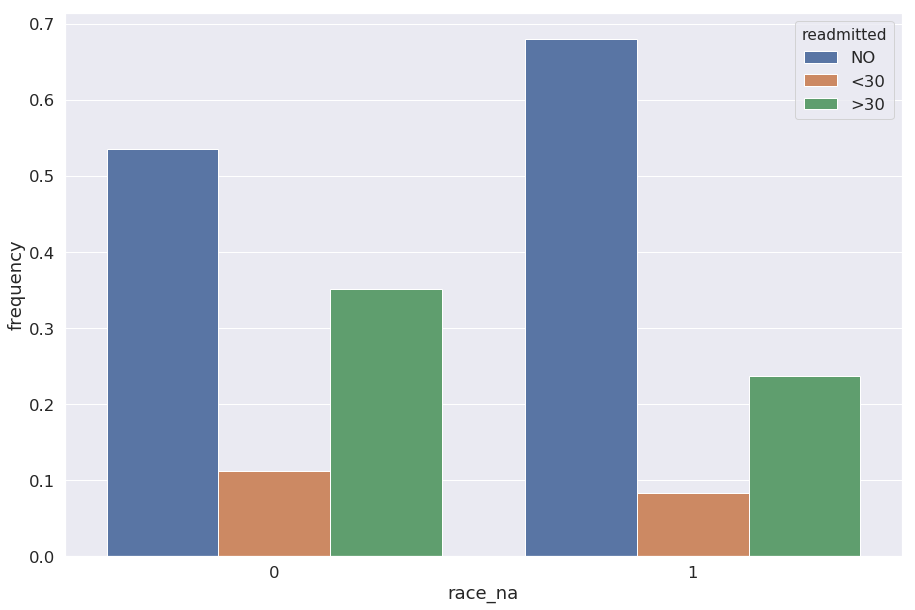

gender_na


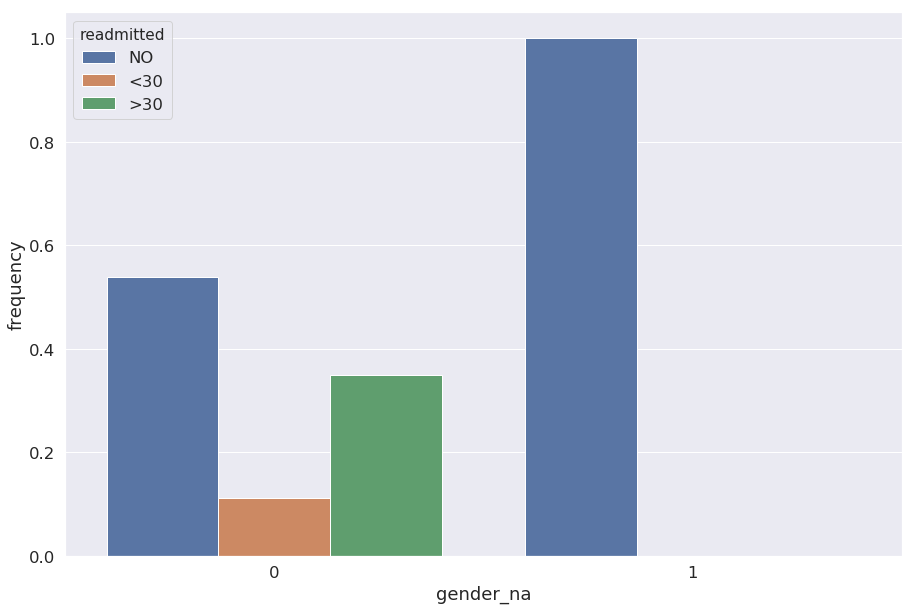

admission_type_id_na


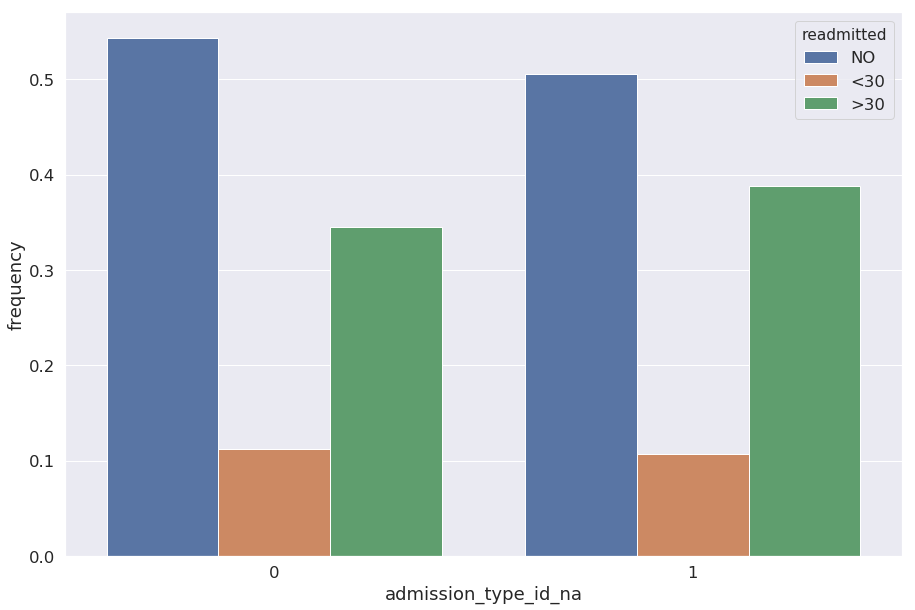

discharge_disposition_id_na


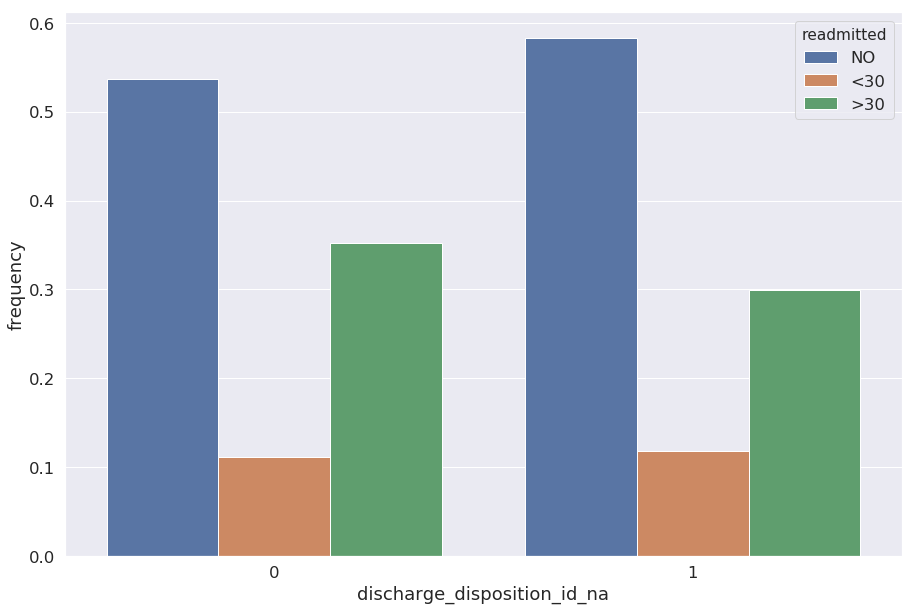

admission_source_id_na


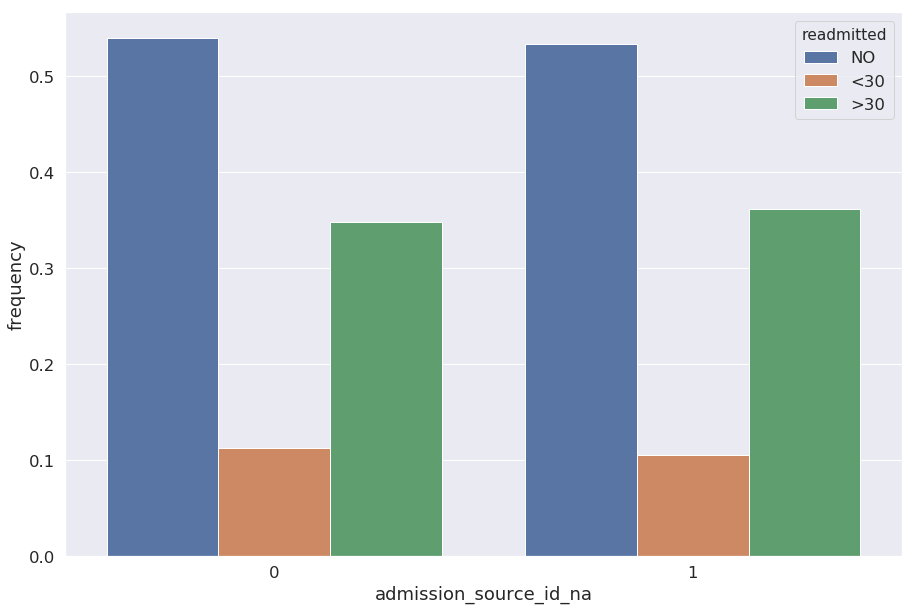

medical_specialty_na


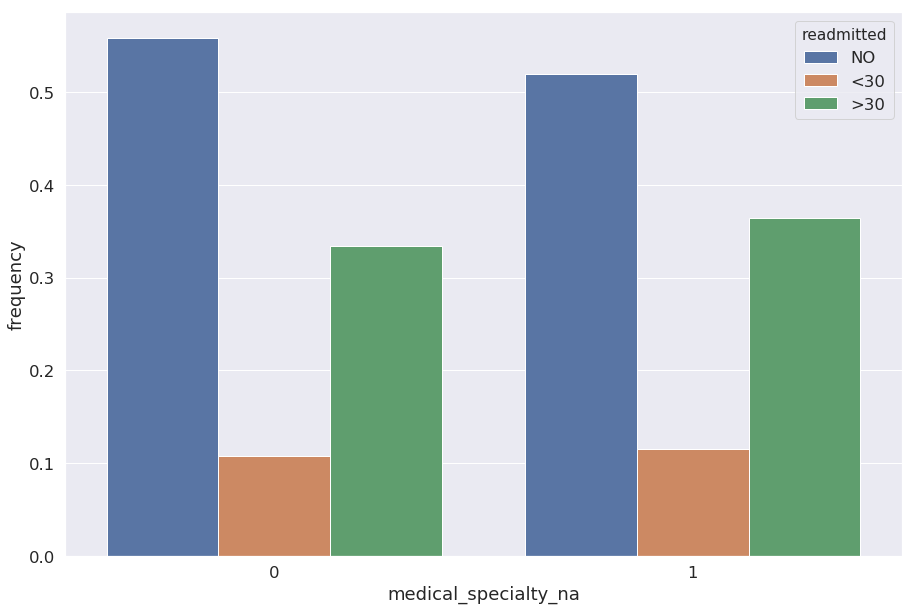

diag_1_na


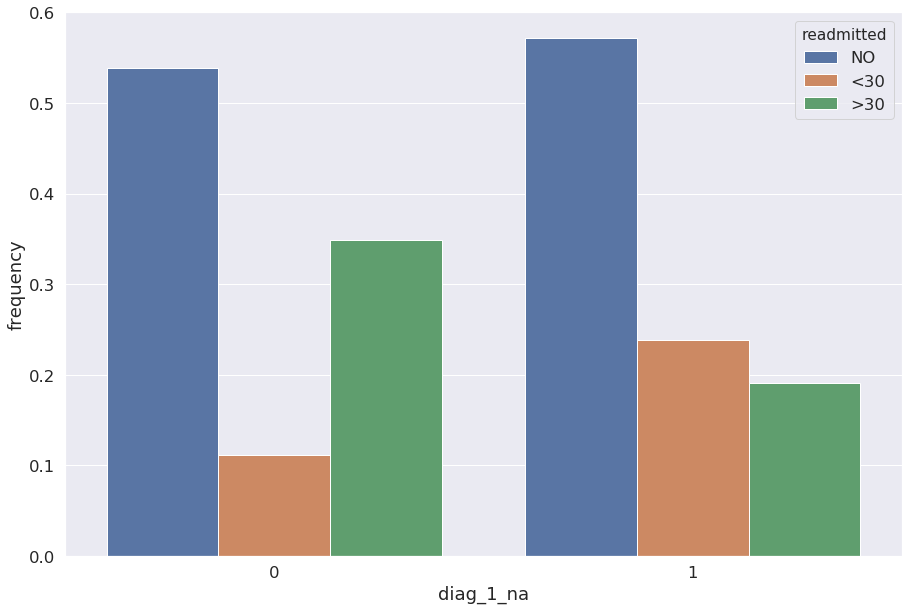

diag_2_na


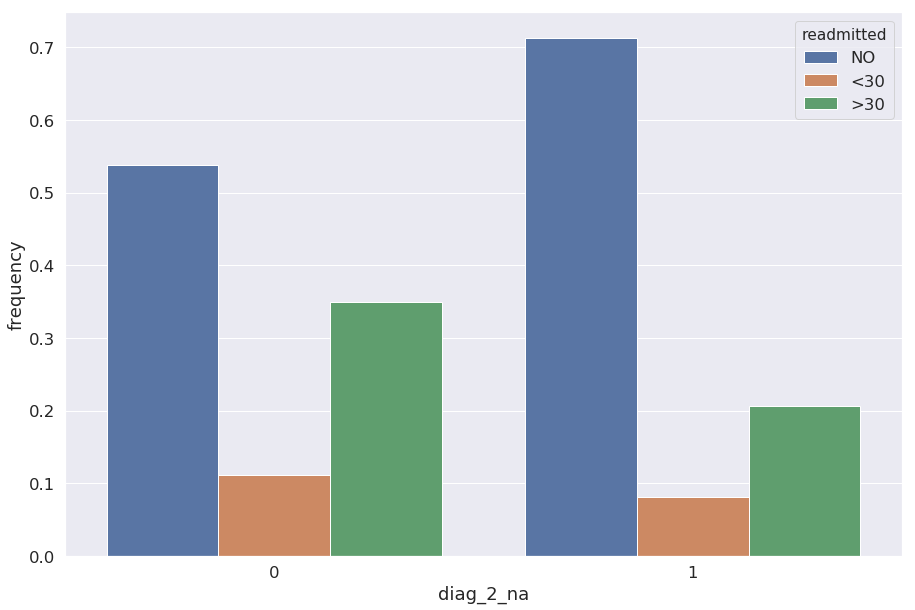

diag_3_na


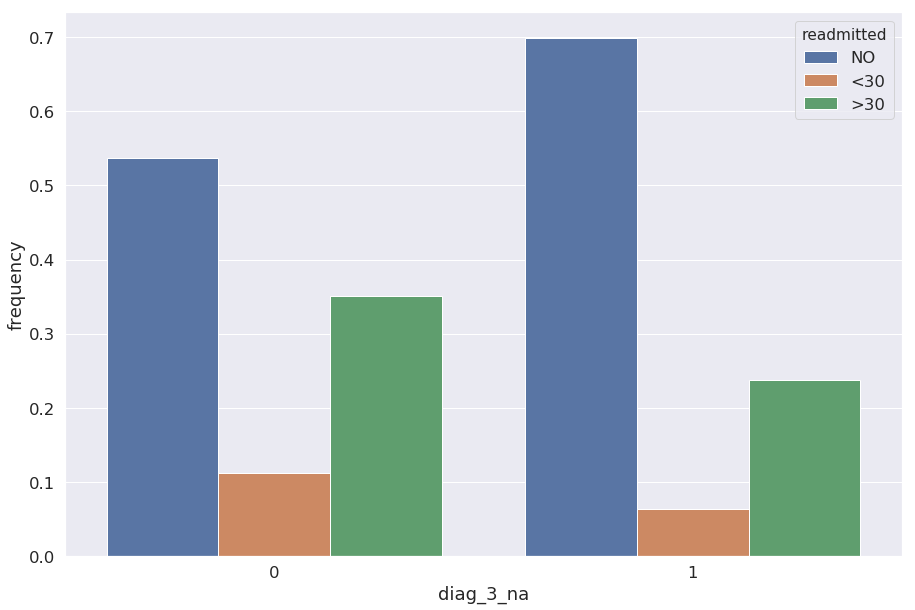

In [7]:
sns.set(font_scale=1.5)
for x_column in x_columns:
    print(x_column)
    plt.figure(figsize=(15, 10))
    sns.barplot(x = x_column, y='frequency', hue='readmitted', 
                        data=frequencies_by_groups(df, [x_column, 'readmitted'], df_labels))
    plt.show()

repaglinide


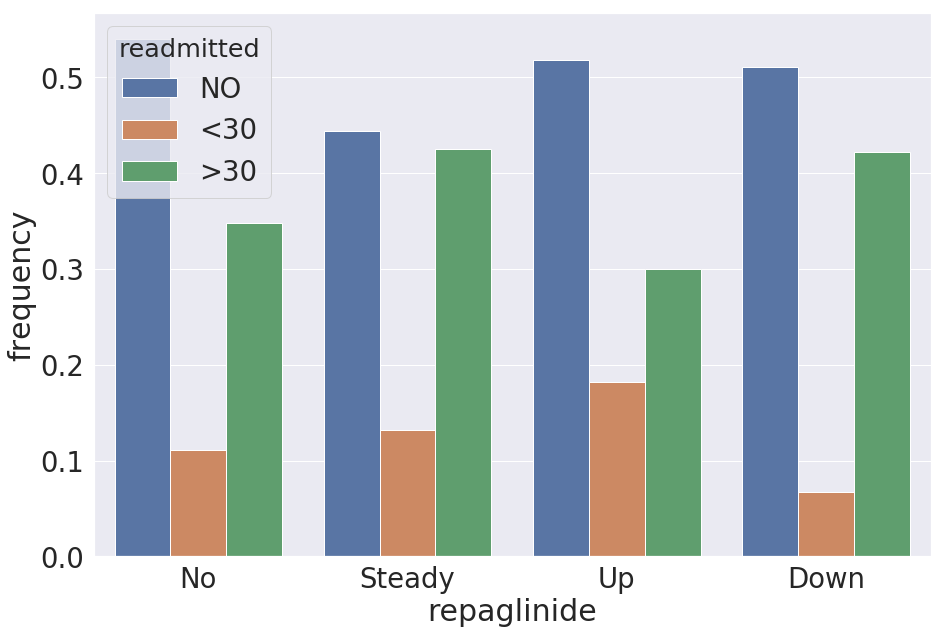

nateglinide


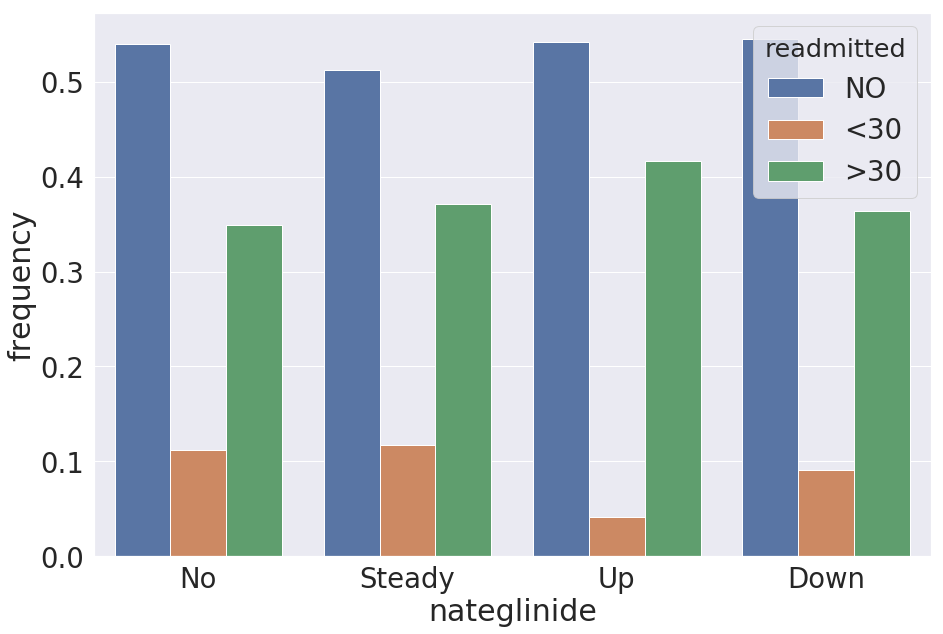

acarbose


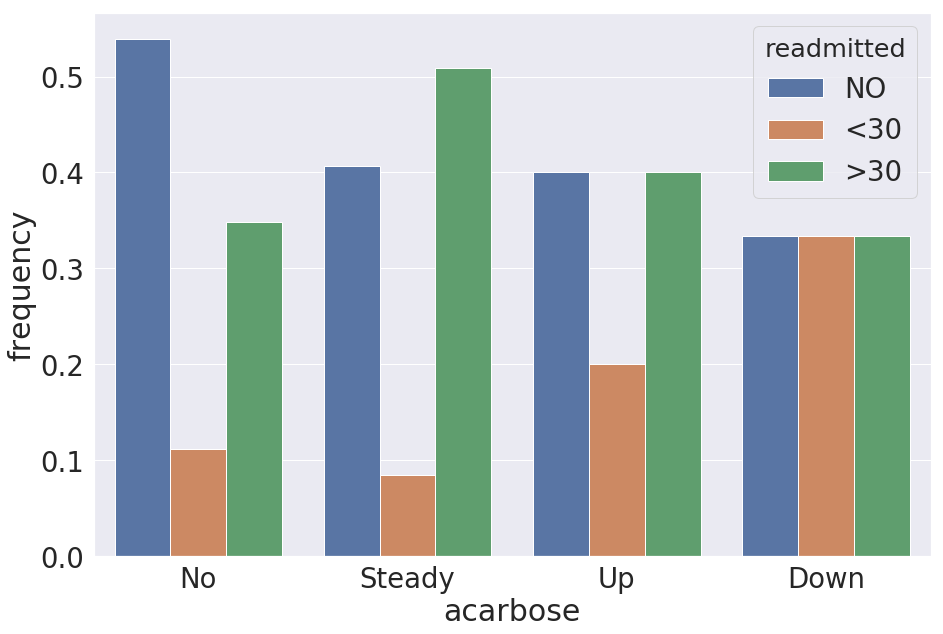

diag_1_na


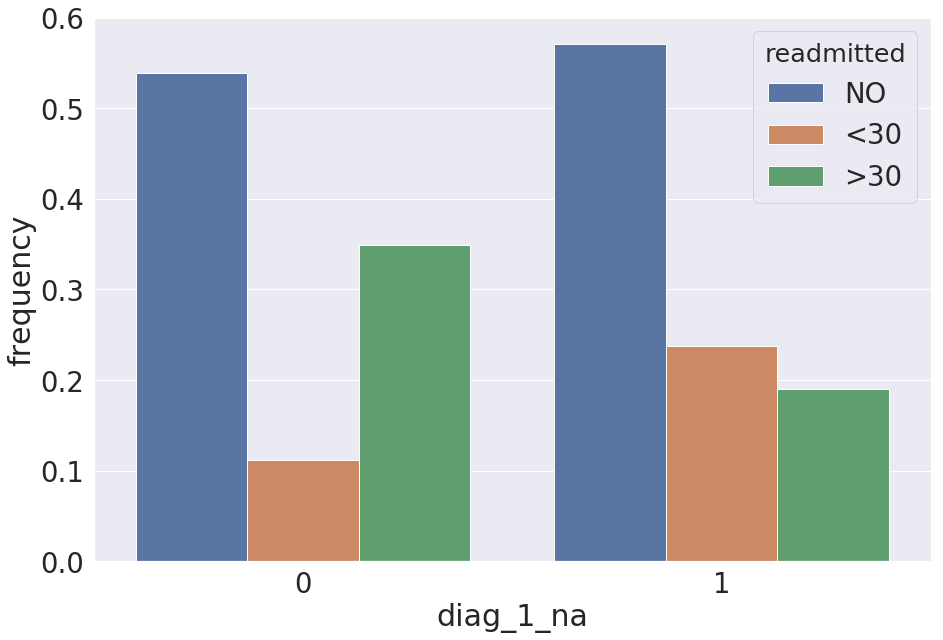

In [8]:
# Redoing the graphs with the larger font size
sns.set(font_scale=2.5)
for x_column in ['repaglinide', 'nateglinide', 'acarbose', 'diag_1_na']:
    print(x_column)
    plt.figure(figsize=(15, 10))
    sns.barplot(x = x_column, y='frequency', hue='readmitted', 
                        data=frequencies_by_groups(df, [x_column, 'readmitted'], df_labels))
    plt.show()
sns.set(font_scale=1.5)

It is clear that some variables show differential distribution of `readmitted` category frequencies. For example, certain `medical_specialty` categories show higher frequency of readmitted patients. Patients with increase in repaglinide dose are also readmitted at the higher frequency. Patients without primary diagnosis are also more likely to be readmitted.

The distribution of frequencies of readmission by age category shows that the patients below 20 years old have the lowest frequencies of readmission within 30 days, all other age groups show higher frequencies. The age group with the highest frequency for the readmission is 20-30 years. 

## How the changes in medications are associated with readmitted variable?


During their hospital encounter the patients’ prescription medication doses were documented and reflected in the data set as either not prescribed, dose did not change, dose increased or dose decreased. The next question that I asked: is there a relationship between dose changes and the frequencies of being readmitted within 30 days? I found that the most dramatic changes in those frequencies were for the following medications for treating diabetes: repaglinide, nateglinide, and acarbose. The changes in the doses of these medications have differential effects on readmission frequency. 
-  Specifically, patients with increased dosage of repaglinide are nearly twice as likely to by readmitted within 30 days than patients without prescription or patients with decreased dosage. These data could indicate that repaglinide could be toxic and an increased dose leads to the hospital readmission. Another possible explanation is that repaglinide is prescribed as a drug of last resort and its increased dosage is just an indication that the patient is severely sick. 
-  Patients with increase dosage of nateglinide decreased the frequency to be readmitted within 30 days by more than half in comparison to patients who did not change their dosage or who were not prescribed nateglinide. One possible interpretation is that an increase in nateglinide dosage could be reducing the frequency of hospital readmission by its increased therapeutic effect. 
-  Changes in medication acarbose have totally different effect: an increase or decrease of the dose led to the increase in the frequency of hospital readmission within 30 days in comparison to the patients who were not prescribed or patients who did not change their dosage of acarbose. Interpretation of acarbose data is more of a challenge. Acarbose could require more gradual changes in its dosages and drastic increase or decrease could lead to toxic effects by the same or different mechanisms. 

In order to add more weight to these interpretations additional analyses are needed.



## What are to top discharge dispositions for hospital readmission?

In [9]:
by_discharge_disposition_ID=frequencies_by_groups(df, ['discharge_disposition_id', 'readmitted'], df_labels)
by_discharge_filtered = by_discharge_disposition_ID.loc[by_discharge_disposition_ID.readmitted == '<30', :].sort_values(by=['frequency'], ascending=False)
by_discharge_filtered['description'] = [df_labels['discharge_disposition_id'][int(id)] if not np.isnan(id) else np.nan for id in by_discharge_filtered.discharge_disposition_id]
by_discharge_filtered = by_discharge_filtered.sort_values(by=['frequency'], ascending=False)
by_discharge_filtered.head(10)

,discharge_disposition_id,readmitted,value_count,sum_by_discharge_disposition_id,frequency,description
34,12.0,<30,2,3,0.666667,Still patient or expected to return for outpat...
42,15.0,<30,28,63,0.444444,Discharged/transferred within this institution...
28,9.0,<30,9,21,0.428571,Admitted as an inpatient to this hospital
62,NaN,<30,51,139,0.366906,NaN
51,23.0,<30,552,1993,0.276969,Discharged/transferred to a long term care hos...
16,5.0,<30,247,1184,0.208615,Discharged/transferred to another type of inpa...
7,2.0,<30,342,2128,0.160714,Discharged/transferred to another short term h...
10,3.0,<30,2046,13954,0.146625,Discharged/transferred to SNF
57,27.0,<30,7,48,0.145833,Discharged/transferred to a federal health car...
22,7.0,<30,90,623,0.144462,Left AMA


Top 3 discharge dispositions for patients that were readmitted within 30 days were 1) still patient or expected to return for outpatient services, 2) Discharged/transferred within this institution to Medicare approved swing bed, 3) Admitted as an inpatient to this hospital.

## What are the top medical specialties of admitting physician for patients readmitted within 30 days?

In [10]:
by_medical_specialty=frequencies_by_groups(df, ['medical_specialty', 'readmitted'], df_labels)
by_medical_specialty = by_medical_specialty.loc[by_medical_specialty.readmitted == '<30', :].sort_values(by=['frequency'], ascending=False)
by_medical_specialty.head(10)

,medical_specialty,readmitted,value_count,sum_by_medical_specialty,frequency
145,Resident,<30,1,2,0.500000
4,AllergyandImmunology,<30,3,7,0.428571
41,Hematology,<30,26,82,0.317073
108,Pediatrics-Hematology-Oncology,<30,1,4,0.250000
50,InfectiousDiseases,<30,8,37,0.216216
44,Hematology/Oncology,<30,40,207,0.193237
72,Oncology,<30,66,348,0.189655
120,PhysicianNotFound,<30,2,11,0.181818
148,Rheumatology,<30,3,17,0.176471
176,Surgery-Plastic,<30,7,41,0.170732


Resident, Allergy and Immunology, and hematology specialists were the highly likely to admit patients that were readmitted into a hospital within 30 days.

## Does having larger number of lab procedures implies higher readmission rage?

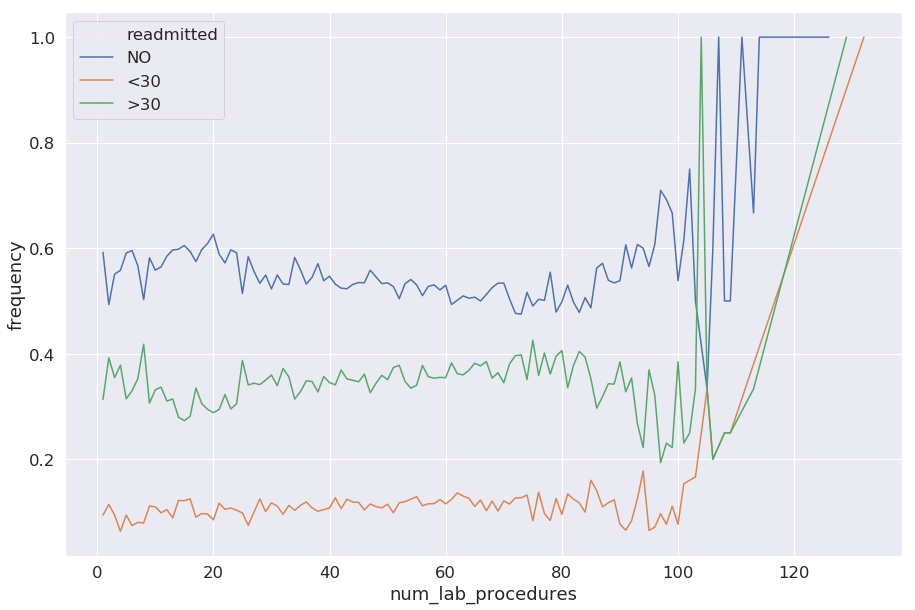

In [11]:
by_num_lab_procedures = frequencies_by_groups(df, ['num_lab_procedures', 'readmitted'], df_labels)
plt.figure(figsize=(15, 10))
sns.lineplot(x = 'num_lab_procedures', 
             y='frequency', 
             hue='readmitted', 
             data=by_num_lab_procedures)

Indeed after 100 lab procedures we see a sharp increase in the frequency of readmissions.

In [12]:
by_num_lab_procedures.loc[by_num_lab_procedures.readmitted == '<30', :].sort_values(by=['num_lab_procedures'], ascending=False).head(10)

,num_lab_procedures,readmitted,value_count,sum_by_num_lab_procedures,frequency
331,132,<30,1,1,1.000000
320,109,<30,1,4,0.250000
317,108,<30,1,4,0.250000
313,106,<30,1,5,0.200000
310,105,<30,2,6,0.333333
306,103,<30,1,6,0.166667
301,101,<30,2,13,0.153846
298,100,<30,1,13,0.076923
295,99,<30,1,9,0.111111
292,98,<30,2,26,0.076923


## What are the top primary diagnoses among the readmitted patients? 

Are the top primary diagnoses different for patients from other `readmitted` categories?

In [13]:
by_diag1 = frequencies_by_groups(df, ['diag_1', 'readmitted'], df_labels)
by_diag1.head()

,diag_1,readmitted,value_count,sum_by_diag_1,frequency
0,NaN,NO,12,21,0.571429
1,NaN,<30,5,21,0.238095
2,NaN,>30,4,21,0.190476
3,10,NO,1,1,1.000000
4,11,NO,7,10,0.700000


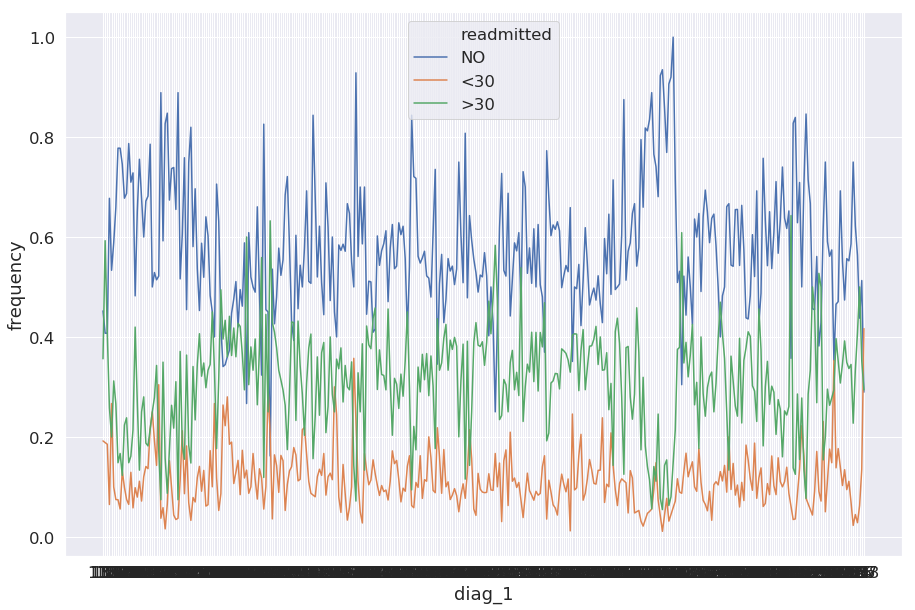

In [14]:
plt.figure(figsize=(15, 10))
sns.lineplot(x = 'diag_1', 
             y='frequency', 
             hue='readmitted', 
             data=by_diag1.loc[by_diag1.sum_by_diag_1 > 12, ['diag_1', 'readmitted', 'frequency']])

In [15]:
by_diag1_box = by_diag1.loc[by_diag1.sum_by_diag_1 > 12, :]
by_diag1_box = by_diag1_box.pivot(index='diag_1', columns='readmitted', values='frequency')
by_diag1_box.head()

readmitted,<30,>30,NO
diag_1,,,
NaN,0.238095,0.190476,0.571429
112,0.191781,0.356164,0.452055
135,NaN,0.592593,0.407407
150,0.185185,0.407407,0.407407
151,0.064516,0.258065,0.677419


## Are there primary diagnoses that are associated with higher chances of being readmitted within 30 days? 
The box plot of distribution of frequencies by primary diagnosis shows that frequencies of hospital encounters with readmission within 30 days are generally in the low range in comparison to not readmitted group. However there are primary diagnoses that show much higher frequency of readmission within 30 days.

Text(0,0.5,'frequency')

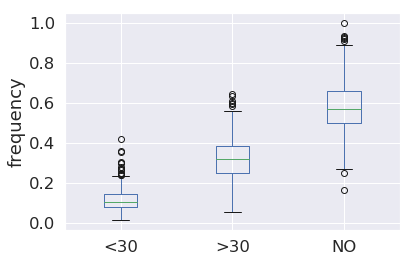

In [16]:
by_diag1_box.plot.box()
plt.ylabel('frequency')

In [17]:
tree = ICD9('icd9/codes.json')
def simplify_codes(codes):
    """Takes a series of codes, simplifies and pads them with zeros to be useful for searching in ICD9 database
    Args:
        codes: a Series of ICD9 codes in extended format
    Returns:
        List containing simplified and padded ICD9 codes. The order corresponds to the codes in the argument.
    """
    pat = '^([EV]?\\d\\d?\\d?\\.?\\d?).?'
    short_pat = '^(\\d*)'
    simple_codes = [re.search(pat, code).group(1) if type(code) == str else np.nan for code in codes]
    simple_codes_padded = [('0' * (3 - len(re.search(short_pat , code).group(1))) + code) if (type(code)==str and bool(re.search(short_pat , code).group())) else code for code in simple_codes]
    return simple_codes_padded

def find_description(code):
    try:
        int(code)
        if int(code) in range(910, 920):
            return tree.find('905').description
        elif int(code) == 235:
            return tree.find('236').description
        elif int(code) == 752:
            return tree.find('751').description
        else:
            return tree.find(code).description
    except ValueError:
       return tree.find(code).description

In [18]:
top_diag1_readmitted_shortly = by_diag1.loc[np.logical_and(
    by_diag1.readmitted == '<30',
    by_diag1.value_count>12), :].sort_values('frequency', ascending=False).head(20)
top_diag1_readmitted_shortly['description'] = [find_description(code) for code in simplify_codes(top_diag1_readmitted_shortly.diag_1)]
top_diag1_readmitted_shortly[['diag_1', 'frequency', 'value_count', 'description']]

,diag_1,frequency,value_count,description
1684,V58,0.416667,95,Encounter for other and unspecified procedures...
274,250.41,0.263736,24,Diabetes with renal manifestations
970,567,0.245614,14,Peritonitis and retroperitoneal infections
277,250.42,0.222222,20,Diabetes with renal manifestations
415,298,0.218750,14,Other nonorganic psychoses
716,443,0.218182,24,Other peripheral vascular disease
1038,593,0.207921,21,Other disorders of kidney and ureter
367,282,0.205882,14,Hereditary hemolytic anemias
986,572,0.205021,49,Liver abscess and sequelae of chronic liver di...
704,438,0.200000,17,Late effects of cerebrovascular disease


In [19]:
top_diag1_readmitted_longer = by_diag1.loc[np.logical_and(
    by_diag1.readmitted == '>30',
    by_diag1.value_count>12), :].sort_values('frequency', ascending=False).head(20)
top_diag1_readmitted_longer['description'] = [tree.find(code).description for code in simplify_codes(top_diag1_readmitted_longer.diag_1)]
top_diag1_readmitted_longer[['diag_1', 'frequency', 'value_count', 'description']]

,diag_1,frequency,value_count,description
368,282,0.632353,43,Hereditary hemolytic anemias
1190,693,0.608696,14,Dermatitis due to substances taken internally
18,135,0.592593,16,Sarcoidosis
826,494,0.583333,14,Bronchiectasis
354,277,0.558824,19,Other and unspecified disorders of metabolism
878,522,0.538462,14,Diseases of pulp and periapical tissues
1552,924,0.527273,29,Contusion of lower limb and of other and unspe...
1527,9,0.500000,23,Ill-defined intestinal infections
272,250.4,0.494382,132,Diabetes with renal manifestations
823,493,0.479167,506,Asthma


In [20]:
top_diag1_not_readmitted = by_diag1.loc[np.logical_and(
    by_diag1.readmitted == 'NO',
    by_diag1.value_count>12), :].sort_values('frequency', ascending=False).head(20)
top_diag1_not_readmitted['description'] = [find_description(code) for code in simplify_codes(top_diag1_not_readmitted.diag_1)]
top_diag1_not_readmitted[['diag_1', 'frequency', 'value_count', 'description']]

,diag_1,frequency,value_count,description
1162,664,1.000000,20,Trauma to perineum and vulva during delivery
1140,654,0.934783,86,Abnormality of organs and soft tissues of pelvis
570,378,0.928571,13,Strabismus and other disorders of binocular ey...
1158,661,0.920000,23,Abnormality of forces of labor
1150,659,0.906250,29,Other indications for care or intervention rel...
195,235,0.888889,24,Neoplasm of uncertain behavior of genitourinar...
1106,627,0.888889,16,Menopausal and postmenopausal disorders
149,205,0.888889,24,Myeloid leukemia
1057,601,0.875000,14,Inflammatory diseases of prostate
1144,656,0.857143,18,Other known or suspected fetal and placental p...


In [21]:
by_simple_diag_1 = frequencies_by_groups(df, ['simple_diag_1', 'readmitted'], df_labels)
top_simple_diag_1_readmitted_shortly = by_simple_diag_1.loc[np.logical_and(
    by_simple_diag_1.readmitted == '<30',
    by_simple_diag_1.value_count>12), :].sort_values('frequency', ascending=False).head(20)
top_simple_diag_1_readmitted_shortly['description'] = [find_description(code) for code in simplify_codes(top_simple_diag_1_readmitted_shortly.simple_diag_1)]
top_simple_diag_1_readmitted_shortly[['simple_diag_1', 'frequency', 'value_count', 'description']]

,simple_diag_1,frequency,value_count,description
1622,V58,0.416667,95,Encounter for other and unspecified procedures...
942,567,0.245614,14,Peritonitis and retroperitoneal infections
426,298,0.218750,14,Other nonorganic psychoses
705,443,0.218182,24,Other peripheral vascular disease
1008,593,0.207921,21,Other disorders of kidney and ureter
378,282,0.205882,14,Hereditary hemolytic anemias
957,572,0.205021,49,Liver abscess and sequelae of chronic liver di...
693,438,0.200000,17,Late effects of cerebrovascular disease
218,202,0.192308,20,Other malignant neoplasms of lymphoid and hist...
86,112,0.191781,14,Candidiasis


In [22]:
by_level_4_diag_1 = frequencies_by_groups(df, ['level_4_diag_1', 'readmitted'], df_labels)
top_level_4_diag_1_readmitted_shortly = by_level_4_diag_1.loc[np.logical_and(
    by_level_4_diag_1.readmitted == '<30',
    by_level_4_diag_1.value_count>12), :].sort_values('frequency', ascending=False).head(20)
top_level_4_diag_1_readmitted_shortly['description'] = [find_description(code) for code in simplify_codes(top_level_4_diag_1_readmitted_shortly.level_4_diag_1)]
top_level_4_diag_1_readmitted_shortly[['level_4_diag_1', 'frequency', 'value_count', 'description']]

,level_4_diag_1,frequency,value_count,description
1585,V58,0.416667,95,Encounter for other and unspecified procedures...
913,567,0.245614,14,Peritonitis and retroperitoneal infections
397,298,0.218750,14,Other nonorganic psychoses
676,443,0.218182,24,Other peripheral vascular disease
979,593,0.207921,21,Other disorders of kidney and ureter
349,282,0.205882,14,Hereditary hemolytic anemias
928,572,0.205021,49,Liver abscess and sequelae of chronic liver di...
664,438,0.200000,17,Late effects of cerebrovascular disease
218,202,0.192308,20,Other malignant neoplasms of lymphoid and hist...
86,112,0.191781,14,Candidiasis


In [23]:
by_level_3_diag_1 = frequencies_by_groups(df, ['level_3_diag_1', 'readmitted'], df_labels)
top_level_3_diag_1_readmitted_shortly = by_level_3_diag_1.loc[np.logical_and(
    by_level_3_diag_1.readmitted == '<30',
    by_level_3_diag_1.value_count>12), :].sort_values('frequency', ascending=False).head(20)
top_level_3_diag_1_readmitted_shortly['description'] = [find_description(code) for code in simplify_codes(top_level_3_diag_1_readmitted_shortly.level_3_diag_1)]
top_level_3_diag_1_readmitted_shortly[['level_3_diag_1', 'frequency', 'value_count', 'description']]

,level_3_diag_1,frequency,value_count,description
360,V58,0.416667,95,Encounter for other and unspecified procedures...
90,282,0.205882,14,Hereditary hemolytic anemias
57,200-208,0.180995,40,Lymphosarcoma and reticulosarcoma and other sp...
325,960-979,0.170455,45,Poisoning by antibiotics
279,790-796,0.164021,31,Nonspecific findings on examination of blood
135,350-359,0.163934,20,Trigeminal nerve disorders
105,287,0.162791,14,Purpura and other hemorrhagic conditions
34,110-118,0.160920,14,Dermatophytosis
246,700-709,0.158621,46,Corns and callosities
163,440-449,0.155425,212,Atherosclerosis


In [24]:
by_level_2_diag_1 = frequencies_by_groups(df, ['level_2_diag_1', 'readmitted'], df_labels)
top_level_2_diag_1_readmitted_shortly = by_level_2_diag_1.loc[np.logical_and(
    by_level_2_diag_1.readmitted == '<30',
    by_level_2_diag_1.value_count>12), :].sort_values('frequency', ascending=False).head(20)
top_level_2_diag_1_readmitted_shortly['description'] = [find_description(code) for code in simplify_codes(top_level_2_diag_1_readmitted_shortly.level_2_diag_1)]
top_level_2_diag_1_readmitted_shortly[['level_2_diag_1', 'frequency', 'value_count', 'description']]

,level_2_diag_1,frequency,value_count,description
58,V50-V59,0.163772,264,Elective surgery for purposes other than remed...
13,280-289,0.134180,148,Iron deficiency anemias
10,240-279,0.127847,1465,Simple and unspecified goiter
49,800-999,0.122455,854,Fracture of vault of skull
16,290-319,0.122016,276,Dementias
4,001-139,0.114523,317,Cholera
22,390-459,0.114517,3474,Rheumatic fever without mention of heart invol...
31,580-629,0.108113,549,Acute glomerulonephritis
25,460-519,0.106851,1112,Acute nasopharyngitis [common cold]
28,520-579,0.104909,966,Disorders of tooth development and eruption


It is clear that the top primary diagnoses are strikingly different for 3 categories of `readmitted` variable (readmitted within 30 days, readmitted after 30 days, not readmitted). Also the grouppings of diagnosis at different levels showed different distributions across the readmitted groups. Generally speaking the top frequencies of primary diagnoses of patients readmitted within 30 days generally decreased with higher level of groupping. This property could be useful during machine learning of classification since different levels of diagnosis grouppings could capture different aspects useful for prediction.

## Are there any linear relationships that exist between the numerical variables and their frequencies in the group of patients readmitted within 30 days?

Overall there is moderate to low correlation between the `readmitted` variable and other variables. The variables showing largest correlation are: `number_inpatient`, `number_emergency`, and `number_outpatient`. In the next steps I will investigate their relationship with the dependent variable further.

The slope is 0.018422734933457318


/home/pavel/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Observed Pearson correlation coefficient: 0.4635089552918075
p-val = 0.0003


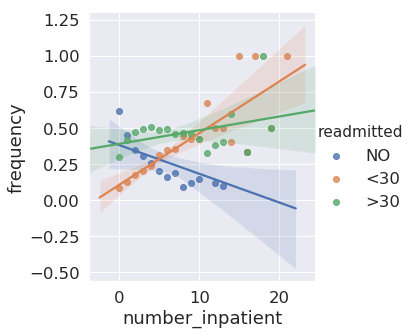

In [25]:
drugs = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
        'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglit', 'troglitazone',
        'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
        'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']
def frequencies_by_groups(df, groups, df_labels):
    by_groups = df[groups].groupby(groups).size()
    by_groups.name = 'value_count'
    by_groups = by_groups.reset_index()
    by_group1_sum = df[groups].groupby(groups[0]).size()
    by_group1_sum.name = 'sum_by_{}'.format(groups[0])
    by_group1_sum = by_group1_sum.reset_index()
    by_groups_merged = by_groups.merge(by_group1_sum)
    by_groups_merged['frequency'] = by_groups_merged.value_count.divide(by_groups_merged['sum_by_{}'.format(groups[0])])
    by_groups_merged.readmitted = by_groups_merged.readmitted.map(dict(zip(range(len(df_labels['readmitted'])), df_labels['readmitted'])))
    if groups[0] in drugs:
        by_groups_merged[groups[0]] = by_groups_merged[groups[0]].map(dict(zip(range(len(df_labels['drugs'])), df_labels['drugs'])))
    elif groups[0] in df_labels.keys():
        by_groups_merged[groups[0]] = by_groups_merged[groups[0]].map(dict(zip(range(len(df_labels[groups[0]])), df_labels[groups[0]])))
    return by_groups_merged
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

def test_pearson(x, y, n):
    # Compute observed correlation: r_obs
    r_obs = pearson_r(x, y)
    print('Observed Pearson correlation coefficient: {}'.format(r_obs))

    # Initialize permutation replicates: perm_replicates
    perm_replicates = np.empty(n)

    np.random.seed(342)
    # Draw replicates
    for i in range(n):
        # Permute x
        x_permutated = np.random.permutation(x)

        # Compute Pearson correlation
        perm_replicates[i] = pearson_r(x_permutated, y)

    # Compute p-value: p
    p = np.sum((perm_replicates <= -abs(r_obs)) | (perm_replicates >= abs(r_obs))) / n
    print('p-val =', p)
sns.set(font_scale=1.5)
by_number_inpatient = frequencies_by_groups(df, ['number_inpatient', 'readmitted'], df_labels)
slope, intercept, r_value, p_value, std_err = stats.linregress(by_number_inpatient['number_inpatient'],by_number_inpatient['frequency'])
print('The slope is {}'.format(slope))
sns.lmplot(x='number_inpatient', y='frequency', hue='readmitted', data=by_number_inpatient)
test_pearson(by_number_inpatient.number_inpatient.values, by_number_inpatient.frequency.values, 10000)

I plotted the number of inpatient visits in the year preceding the encounter (number_inpatient) vs its frequency split by the values of readmitted variable. It appears from the plot that there is a strong correlation between the number of inpatient visits and its frequency in the category of patients readmitted within 30 days (the Pearson correlation coefficient was 0.46). The slope of that relationship is 0.018. To test if we are confident that the correlation coefficient of the entire population is different from zero, I performed hypothesis testing using bootstrapping approach. One of the important advantages of the bootstrapping method is no requirements for the distribution. The null hypothesis was that there was no correlation between the number of inpatient visits and its frequency. The alternative hypothesis was that the correlation coefficient is different from zero. I selected the significance level for this and for further tests as 0.01. To simulate the assumption of the null hypothesis I permutated the order of number_inpatient and calculated the Pearson correlation coefficient of that permutated number_inpatient variable vs. original frequency. The expected value of that correlation coefficient is zero. I performed this procedure 10,000 times thereby obtaining 10,000 correlation coefficients. Then, I calculated the fraction of cases that produced the correlation coefficient of the observed correlation coefficient or the one further from zero. This fraction is the P-value that in my case was 0.0003 which is smaller than our previously set significance level. The interpretation of these findings is that the number of inpatient visits in the year preceding the encounter increases with their frequency n the group of patients that were readmitted within 30 days of hospital discharge. The slope of 0.018 indicates that for every additional inpatient visit during the preceding year the chances of being readmitted within 30 days increase by approximately 0.018.

The slope is 0.012990378419102094


/home/pavel/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Observed Pearson correlation coefficient: 0.7114264380377502
p-val = 0.0


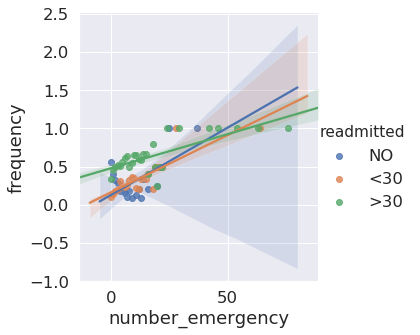

In [26]:
by_number_emergency = frequencies_by_groups(df, ['number_emergency', 'readmitted'], df_labels)
slope, intercept, r_value, p_value, std_err = stats.linregress(by_number_emergency['number_emergency'],by_number_emergency['frequency'])
print('The slope is {}'.format(slope))
sns.lmplot(x='number_emergency', y='frequency', hue='readmitted', data=by_number_emergency)
test_pearson(by_number_emergency.number_emergency.values, by_number_emergency.frequency.values, 10000)

Next I plotted the number of emergency visits in the preceding year vs its frequency split by the readmitted group. The slope of this relationship is 0.013 with the observed Pearson correlation coefficient of 0.71 with the P-value of 0.0 calculated from the bootstrapping sample of 10,000. This is indicates that the actual P-value is close to 0.0001 or below which is smaller than our preselected significance level of 0.01. Therefore, I am confident that the Pearson correlation coefficient is different from zero. Further increasing the size of the bootstrapping sample would allow to estimate the P-value more precisely. My interpretation is that for every increase in the number of emergency visits in the preceding year there is an increase in the chances of being readmitted within 30 days of approximately 0.013.

The slope is 0.014358268747751602


/home/pavel/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Observed Pearson correlation coefficient: 0.6383096531021925
p-val = 0.0


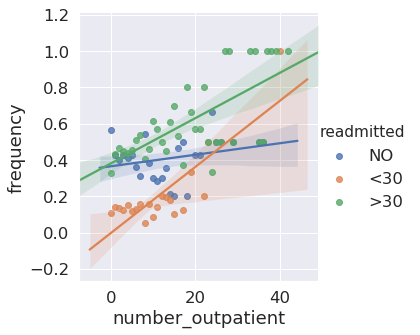

In [27]:
by_number_outpatient = frequencies_by_groups(df, ['number_outpatient', 'readmitted'], df_labels)
slope, intercept, r_value, p_value, std_err = stats.linregress(by_number_outpatient['number_outpatient'], by_number_outpatient['frequency'])
print('The slope is {}'.format(slope))
sns.lmplot(x='number_outpatient', y='frequency', hue='readmitted', data=by_number_outpatient)
test_pearson(by_number_outpatient.number_outpatient.values, by_number_outpatient.frequency.values, 10000)

Next I explored the relationship of the number of outpatient visits in the year preceding the encounter to its frequency split by the readmitted category. The slope of the linear function was calculated to be 0.014, the Pearson correlation coefficient: 0.64 with the P-value calculated by the bootstrapping approach with 10,000 samples of 0.0. This indicates that for each additional outpatient visit during the year preceding the encounter there is an increase in chances of being readmitted within 30 days by approximately 0.014.

## What pairs of independent variables show strong correlations? 

These relationships help us figure out if one of the 2 variables could be removed from the model to help with reducing the number of dimensions. Another benefit of knowing these correlations help us to do the sanity check of the data set. For example, we can predict that the duration of a hospital stay would correlate with the number of lab procedures performed. If we find out that our data set does not show this property, it would raise serious concerns about the quality of the data set. Otherwise, if we see the expected correlations, it increases our assurance about the data set.

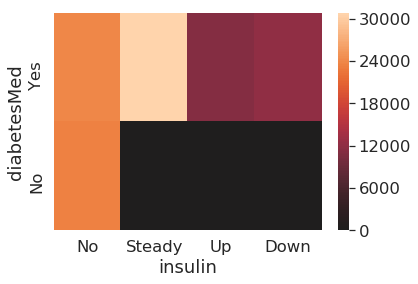

In [28]:
def heatmap2variables(x, y, df, df_labels, drugs):
    temp_df = df[[x, y]].groupby([x, y]).size().copy()
    temp_df.name = 'count'
    temp_df = temp_df.reset_index()
    temp_df = temp_df.pivot(index=y, columns=x, values='count')
    temp_df = temp_df.fillna(0)
    
    if x in drugs:
        x_labels_dict = dict(zip(range(len(df_labels['drugs'])), df_labels['drugs']))
    elif x in df_labels.keys():
        x_labels_dict = dict(zip(range(len(df_labels[x])), df_labels[x]))
        
    if y in drugs:
        y_labels_dict = dict(zip(range(len(df_labels['drugs'])), df_labels['drugs']))
    elif y in df_labels.keys():
        y_labels_dict = dict(zip(range(len(df_labels[y])), df_labels[y]))
    temp_df = temp_df.sort_index(ascending=False)
    if x in drugs or x in df_labels.keys():
        temp_df.columns = temp_df.columns.map(x_labels_dict)
    if y in drugs or y in df_labels.keys():
        temp_df.index = temp_df.index.map(y_labels_dict)
    
    sns.heatmap(temp_df,
                center=0)
    plt.xlabel(x)
    plt.ylabel(y)
heatmap2variables('insulin', 'diabetesMed', df, df_labels, drugs)

One of the strongest correlations observed from the correlation plot is between the change of medications and the insulin feature. The plot above shows the heatmap of the counts of the change and insulin variables. The computed Pearson’s correlation coefficient for these two variables is 0.62. It is clear that all hospital encounters with the insulin levels of “Up” or “Down” cannot have change levels of “No”. This is exactly what is confirmed in this plot as a sanity check.

The slope is 0.1951045443077857


/home/pavel/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Observed Pearson correlation coefficient: 0.4737234648250131
p-val = 0.0


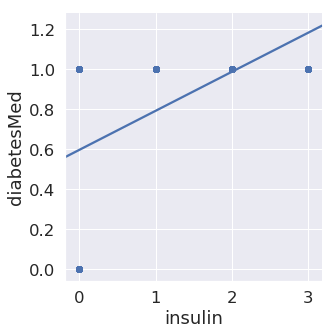

In [29]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['insulin'], df['diabetesMed'])
print('The slope is {}'.format(slope))
sns.lmplot(x='insulin', y='diabetesMed', data=df)
test_pearson(df.insulin.values, df.diabetesMed.values, 10000)

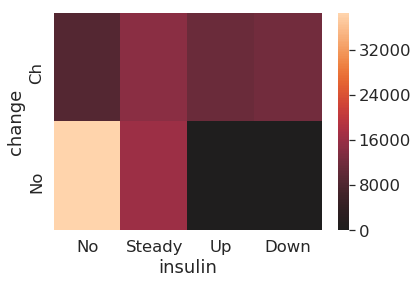

In [30]:
heatmap2variables('insulin', 'change', df, df_labels, drugs)

The count heatmap for number of medications versus number of days between admission and discharge shows that these variables are correlated. This  finding serves as a sanity check since it is expected that the longer hospital stay would be associated with the higher number of medications.

The slope is 0.30342107372879534


/home/pavel/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Observed Pearson correlation coefficient: 0.6218460927682259
p-val = 0.0


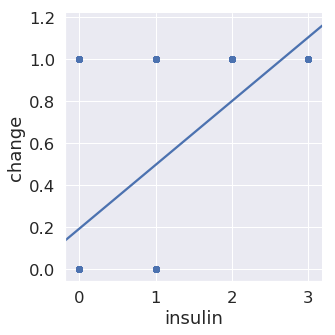

In [31]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['insulin'], df['change'])
print('The slope is {}'.format(slope))
sns.lmplot(x='insulin', y='change', data=df)
test_pearson(df.insulin.values, df.change.values, 10000)

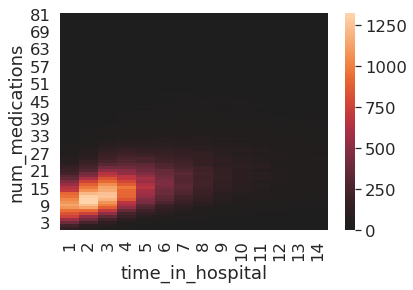

In [32]:
heatmap2variables('time_in_hospital', 'num_medications', df, df_labels, drugs)

The count heatmap for number of medications versus number of days between admission and discharge shows that these variables are correlated. This  finding serves as a sanity check since it is expected that the longer hospital stay would be associated with the higher number of medications.

The slope is 1.269148976425665


/home/pavel/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Observed Pearson correlation coefficient: 0.466135417430776
p-val = 0.0


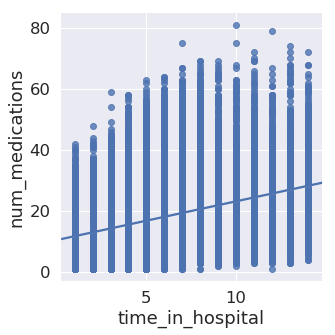

In [33]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['time_in_hospital'], df['num_medications'])
print('The slope is {}'.format(slope))
sns.lmplot(x='time_in_hospital', y='num_medications', data=df)
test_pearson(df.time_in_hospital.values, df.num_medications.values, 10000)

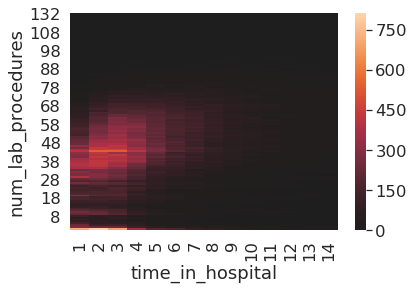

In [34]:
heatmap2variables('time_in_hospital', 'num_lab_procedures', df, df_labels, drugs)

The number of lab tests performed during the encounter is also correlated with the number of days between admission and discharge. 

The slope is 2.0988535313668923


/home/pavel/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Observed Pearson correlation coefficient: 0.31845016879980453
p-val = 0.0


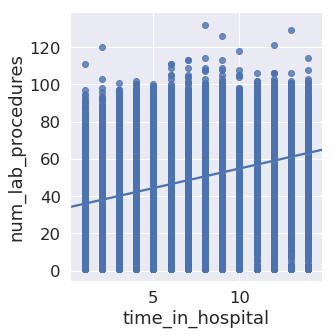

In [35]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['time_in_hospital'], df['num_lab_procedures'])
print('The slope is {}'.format(slope))
sns.lmplot(x='time_in_hospital', y='num_lab_procedures', data=df)
test_pearson(df.time_in_hospital.values, df.num_lab_procedures.values, 10000)

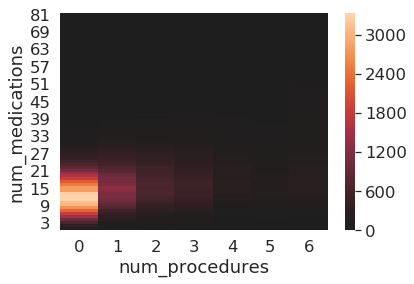

In [36]:
heatmap2variables('num_procedures', 'num_medications', df, df_labels, drugs)

The slope is 1.8380444503878526


/home/pavel/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Observed Pearson correlation coefficient: 0.38576727284855306
p-val = 0.0


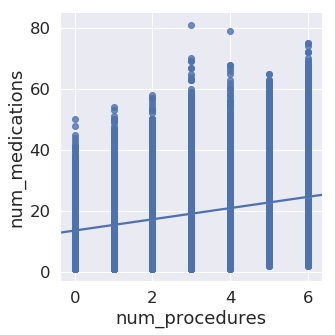

In [37]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['num_procedures'], df['num_medications'])
print('The slope is {}'.format(slope))
sns.lmplot(x='num_procedures', y='num_medications', data=df)
test_pearson(df.num_procedures.values, df.num_medications.values, 10000)

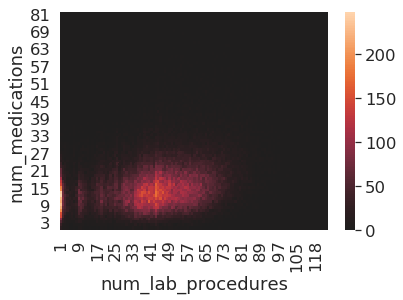

In [38]:
heatmap2variables('num_lab_procedures', 'num_medications', df, df_labels, drugs)

The slope is 0.1107783422995009


/home/pavel/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Observed Pearson correlation coefficient: 0.26816062516987443
p-val = 0.0


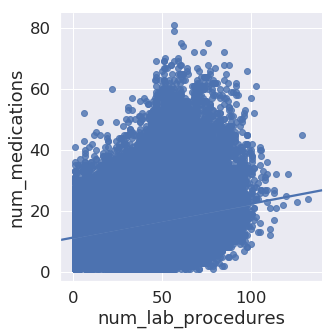

In [39]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['num_lab_procedures'], df['num_medications'])
print('The slope is {}'.format(slope))
sns.lmplot(x='num_lab_procedures', y='num_medications', data=df)
test_pearson(df.num_lab_procedures.values, df.num_medications.values, 10000)

## Conclusion

In conclusion, Exploratory Data Analysis showed that overall there is moderate to low correlation between the readmitted variable and other variables. The variables showing the largest correlations are: number_inpatient, number_emergency, and number_outpatient. In addition, the most dramatic changes in the frequencies of medication changes were for the following medications for treating diabetes: repaglinide, nateglinide, and acarbose. Distribution of the primary diagnoses shows that for some primary diagnoses the frequency of readmission within 30 days is much higher than the median frequency for that group. The top primary diagnoses in the group with readmission within 30 days are 1) encounter for other and unspecified procedures and aftercare, 2) diabetes with renal manifestations, and 3) peritonitis and retroperitoneal infections.